# I. Introduction

=======================================

Objective : This project aims to analyze delivery performance in the logistics sector to identify factors that that can contribute to delay in shipment. Using the available logistics dataset, the data will be cleaned, processed, and used to build a machine learning model that predicts the delivery delays. The prediction results are expected to help the operations team improve delivery planning and assist management in formulating strategies to reduce delays and increase overall logistics efficiency.

=======================================

# II. Problem Statement and Dataset Description

## a. Database Link

https://www.kaggle.com/datasets/datasetengineer/logistics-and-supply-chain-dataset  

## b. Background

The logistics sector is an important sector that contributes to ensuring the supply chain will run smoothly, especially in industries that depend on delivery such as retail, manufacturing, and healthcare. In practice, operational problems are still often encountered that indirectly affect the delivery process, therefore it is necessary to analyze what factors contribute to delivery time. The "Logistics and supply chain dataset" dataset provides a comprehensive picture of what factors affect delivery time.

As a data scientist team from the "NCT Logistics" Company, a 3rd party logistics company that has a vision to always maintain the delivery of goods safely and on time, this analysis is important to predict what important factors need to be considered to maintain on time delivery and reduce delays. By conducting this analysis, the main parties involved; data teamn, operational team, and top level management, are expected to gain insight into minimizing factors that contribute to delays so as to increase business efficiency.

## c. SMART Framework

Here are the objectives of the analysis using the SMART Framework:
- **Specific**: Predicting the probability of delays in logistics delivery based on operational and environmental data.

- **Measurable**: Can reduce the level of delay by 5% from the previous period

- **Achievable**: Create a machine learning model that can predict what factors affect delivery delays

- **Relevant**: Reducing the level of delay will increase logistics efficiency and customer satisfaction

- **Time Bound**: The results of this analysis data will be used within 1 year to reduce delivery delays

## d. Problem Statement & 5W+1H

**PROBLEM STATEMENT**

Delays in delivery can certainly be a problem because it can reduce customer satisfaction. Therefore, it is important to predict what factors affect delivery time. Hopefully, by creating this machine learning model, company can take corrective and preventive action to reduce delay in delivery so that it can improve logistics efficiency.

**5W + 1H**
1. How many total shipment that has been completed from 2021-2024?
2. How is the shipment delay trend from 2021-2024?
3. Which factors that corralated the most in affecting delivery delay?
4. Is weather contribute to delay? In which month it has the highest delay in delivery?
5. What is the average fuel consumption rate for each delay category?
6. Is higher risk classifications lead to greater delay probabilities? 
7. Is driver behaviour impact delivery performance?

## e. Target of Audience 

1. **Company Management**
    - To support data-driven decision-making by identifying key delay-related factors and optimizing supply chain performance.

2. **Operational Team**
    - To provide actionable insights that can help mitigate field-level issues causing shipment delays, such as driver behavior, traffic conditions, or warehouse handling inefficiencies.

3. **Data Team**
    - To help design, monitor, and iterate on features and parameters used in predictive models by understanding which variables are most influential. 
    - To make and determine values used in features ffor prediction by understanding best parameters for each features.
    - To make continuous model improvement and retraining.

# III. Import Libraries

In [1]:
# Define Libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import pearsonr

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For PreProcessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

#Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import cross_val_score

#Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV

# Model Saving
import pickle


# IV. Data Loading

## a. Import Dataset to Dataframe

In [2]:
#import data from csv file 
data = pd.read_csv ('dataset_logistics.csv')
data

timestamp  vehicle_gps_latitude  vehicle_gps_longitude  \
0      2021-01-01 00:00:00             40.375568             -77.014318   
1      2021-01-01 01:00:00             33.507818            -117.036902   
2      2021-01-01 02:00:00             30.020640             -75.269224   
3      2021-01-01 03:00:00             36.649223             -70.190529   
4      2021-01-01 04:00:00             30.001279             -70.012195   
...                    ...                   ...                    ...   
32060  2024-08-28 20:00:00             48.496665            -104.031158   
32061  2024-08-28 21:00:00             34.670137             -89.893091   
32062  2024-08-28 22:00:00             42.963338             -82.149873   
32063  2024-08-28 23:00:00             32.082410             -70.070154   
32064  2024-08-29 00:00:00             38.576482             -94.579542   

       fuel_consumption_rate  eta_variation_hours  traffic_congestion_level  \
0                   5.136512             4.998009                  5.927586   
1                   5.101512             0.984929                  1.591992   
2                   5.090803             4.972665                  8.787765   
3                   8.219558             3.095064                  0.045257   
4                   5.000075             3.216077                  8.004851   
...                      ...                  ...                       ...   
32060               5.421806             4.394370                  0.192421   
32061              10.624778             2.700635                  8.736143   
32062               5.071596             0.485288                  7.420200   
32063               5.000000             4.759411                  0.932050   
32064               5.000046             4.068440                  7.156608   

       warehouse_inventory_level  loading_unloading_time  \
0                     985.716862                4.951392   
1                     396.700206                1.030379   
2                     832.408935                4.220229   
3                       0.573283                0.530186   
4                     914.925067                3.620890   
...                          ...                     ...   
32060                 127.684977                3.607803   
32061                  84.638889                1.218165   
32062                  48.500920                4.999149   
32063                 972.437425                0.505242   
32064                  16.669708                2.207746   

       handling_equipment_availability  order_fulfillment_status  ...  \
0                             0.481294                  0.761166  ...   
1                             0.620780                  0.196594  ...   
2                             0.810933                  0.152742  ...   
3                             0.008525                  0.811885  ...   
4                             0.020083                  0.053659  ...   
...                                ...                       ...  ...   
32060                         0.208643                  0.992997  ...   
32061                         0.472389                  0.946031  ...   
32062                         0.064366                  0.437687  ...   
32063                         0.250949                  0.517051  ...   
32064                         0.486014                  0.985761  ...   

       iot_temperature  cargo_condition_status  route_risk_level  \
0             0.574400                0.777263          1.182116   
1            -9.753493                0.091839          9.611988   
2            -6.491034                0.253529          6.570431   
3            -0.151276                0.877576          0.548952   
4             2.429448                0.262081          8.861443   
...                ...                     ...               ...   
32060        -8.835069                0.199377          9.893402   
32061        -2.517654   

## b. Duplicate Dataframe

In [3]:
#Dupliacate dataframe

df = data.copy()
df.reset_index(drop =True, inplace= True)
df


timestamp  vehicle_gps_latitude  vehicle_gps_longitude  \
0      2021-01-01 00:00:00             40.375568             -77.014318   
1      2021-01-01 01:00:00             33.507818            -117.036902   
2      2021-01-01 02:00:00             30.020640             -75.269224   
3      2021-01-01 03:00:00             36.649223             -70.190529   
4      2021-01-01 04:00:00             30.001279             -70.012195   
...                    ...                   ...                    ...   
32060  2024-08-28 20:00:00             48.496665            -104.031158   
32061  2024-08-28 21:00:00             34.670137             -89.893091   
32062  2024-08-28 22:00:00             42.963338             -82.149873   
32063  2024-08-28 23:00:00             32.082410             -70.070154   
32064  2024-08-29 00:00:00             38.576482             -94.579542   

       fuel_consumption_rate  eta_variation_hours  traffic_congestion_level  \
0                   5.136512             4.998009                  5.927586   
1                   5.101512             0.984929                  1.591992   
2                   5.090803             4.972665                  8.787765   
3                   8.219558             3.095064                  0.045257   
4                   5.000075             3.216077                  8.004851   
...                      ...                  ...                       ...   
32060               5.421806             4.394370                  0.192421   
32061              10.624778             2.700635                  8.736143   
32062               5.071596             0.485288                  7.420200   
32063               5.000000             4.759411                  0.932050   
32064               5.000046             4.068440                  7.156608   

       warehouse_inventory_level  loading_unloading_time  \
0                     985.716862                4.951392   
1                     396.700206                1.030379   
2                     832.408935                4.220229   
3                       0.573283                0.530186   
4                     914.925067                3.620890   
...                          ...                     ...   
32060                 127.684977                3.607803   
32061                  84.638889                1.218165   
32062                  48.500920                4.999149   
32063                 972.437425                0.505242   
32064                  16.669708                2.207746   

       handling_equipment_availability  order_fulfillment_status  ...  \
0                             0.481294                  0.761166  ...   
1                             0.620780                  0.196594  ...   
2                             0.810933                  0.152742  ...   
3                             0.008525                  0.811885  ...   
4                             0.020083                  0.053659  ...   
...                                ...                       ...  ...   
32060                         0.208643                  0.992997  ...   
32061                         0.472389                  0.946031  ...   
32062                         0.064366                  0.437687  ...   
32063                         0.250949                  0.517051  ...   
32064                         0.486014                  0.985761  ...   

       iot_temperature  cargo_condition_status  route_risk_level  \
0             0.574400                0.777263          1.182116   
1            -9.753493                0.091839          9.611988   
2            -6.491034                0.253529          6.570431   
3            -0.151276                0.877576          0.548952   
4             2.429448                0.262081          8.861443   
...                ...                     ...               ...   
32060        -8.835069                0.199377          9.893402   
32061        -2.517654   

Data Information

- Timestamp                         : The date and time when the data was recorded (hourly resolution).
- Vehicle GPS Latitude              : The latitude coordinate indicating the location of the vehicle.
- Vehicle GPS Longitude             : The longitude coordinate indicating the location of the vehicle.
- Fuel Consumption Rate             : The rate of fuel consumption recorded for the vehicle in liters per hour.
- ETA Variation (hours)             : The difference between the estimated and actual arrival times.
- Traffic Congestion Level          : The level of traffic congestion affecting the logistics route (scale 0-10).
- Warehouse Inventory Level         : The current inventory levels at the warehouse (units).
- Loading/Unloading Time            : The time taken for loading or unloading operations in hours.
- Handling Equipment Availability   : Availability status of equipment like forklifts (0 = unavailable, 1 = available).
- Order Fulfillment Status          : Status indicating whether the order was fulfilled on time (0 = not fulfilled, 1 = fulfilled).
- Weather Condition Severity        : The severity of weather conditions affecting operations (scale 0-1).
- Port Congestion Level             : The level of congestion at the port (scale 0-10).
- Shipping Costs                    : The costs associated with the shipping operations in USD.
- Supplier Reliability Score        : A score indicating the reliability of the supplier (scale 0-1).
- Lead Time (days)                  : The average time taken for a supplier to deliver materials.
- Historical Demand                 : The historical demand for logistics services (units).
- IoT Temperature                   : The temperature recorded by IoT sensors in degrees Celsius.
- Cargo Condition Status            : Condition status of the cargo based on IoT monitoring (0 = poor, 1 = good).
- Route Risk Level                  : The risk level associated with a particular logistics route (scale 0-10).
- Customs Clearance Time            : The time required to clear customs for shipments.
- Driver Behavior Score             : An indicator of the driver's behavior based on driving patterns (scale 0-1).
- Fatigue Monitoring Score          : A score indicating the level of driver fatigue (scale 0-1).

Target Variables (Labels)
The dataset also includes several target variables for predictive modeling:

- Disruption Likelihood Score       : A score predicting the likelihood of a disruption occurring (scale 0-1).
- Delay Probability                 : The probability of a shipment being delayed (scale 0-1)--> will be used as target
- Risk Classification               : A categorical classification indicating the level of risk (Low Risk, Moderate Risk, High Risk).
- Delivery Time Deviation           : The deviation in hours from the expected delivery time.

## d. Check Info From Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [5]:
#Change timestamp to date time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   timestamp                        32065 non-null  datetime64[ns]
 1   vehicle_gps_latitude             32065 non-null  float64       
 2   vehicle_gps_longitude            32065 non-null  float64       
 3   fuel_consumption_rate            32065 non-null  float64       
 4   eta_variation_hours              32065 non-null  float64       
 5   traffic_congestion_level         32065 non-null  float64       
 6   warehouse_inventory_level        32065 non-null  float64       
 7   loading_unloading_time           32065 non-null  float64       
 8   handling_equipment_availability  32065 non-null  float64       
 9   order_fulfillment_status         32065 non-null  float64       
 10  weather_condition_severity       32065 non-null  float64  

From this dataframe info, we can see there are 15 columns and 32.065 rows

## e. Check Missing Value

In [6]:
#check missing value

df.isnull().sum()

timestamp                          0
vehicle_gps_latitude               0
vehicle_gps_longitude              0
fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
disruption_likelihood_score        0
delay_probability                  0
risk_classification                0
delivery_time_deviation            0
dtype: int64

There are no missing values on this dataset. So can skip handling missing value steps

## f. Check Duplicate Data

In [7]:
# Showing duplicates rows (if any)
dupes = df[df.duplicated(keep=False)]
dupes_sorted = dupes.sort_values(by=['timestamp'])

dupes_sorted

Empty DataFrame
Columns: [timestamp, vehicle_gps_latitude, vehicle_gps_longitude, fuel_consumption_rate, eta_variation_hours, traffic_congestion_level, warehouse_inventory_level, loading_unloading_time, handling_equipment_availability, order_fulfillment_status, weather_condition_severity, port_congestion_level, shipping_costs, supplier_reliability_score, lead_time_days, historical_demand, iot_temperature, cargo_condition_status, route_risk_level, customs_clearance_time, driver_behavior_score, fatigue_monitoring_score, disruption_likelihood_score, delay_probability, risk_classification, delivery_time_deviation]
Index: []

[0 rows x 26 columns]

There are no duplicate data on this dataset. Because timestamp is used as index, so all the data shown are based on the time where it were saved and no duplicates.

# V. Exploratory Data Analysis

Add new column to identify Delay Probability Classification. In this model, will be made classification like this for delay probability

- 0.0 - 0.30 = Low Risk
- 0.31 - 0.70 = Moderate Risk
- 0.71 - 1.00 = High Risk

In [8]:
#Make classification for delay
def categorize_delay(p):
    if p < 0.3:
        return 'Low Risk'
    elif p < 0.7:
        return 'Moderate Risk'
    else:
        return 'High Risk'

df['delay_category'] = df['delay_probability'].apply(categorize_delay)


## a. Shipment Trend From 2021 - 2024

In [9]:
# Make new column of month-year
df['month_shipment'] = df['timestamp'].dt.to_period('M')


### Total Shipment From 2021 - 2024

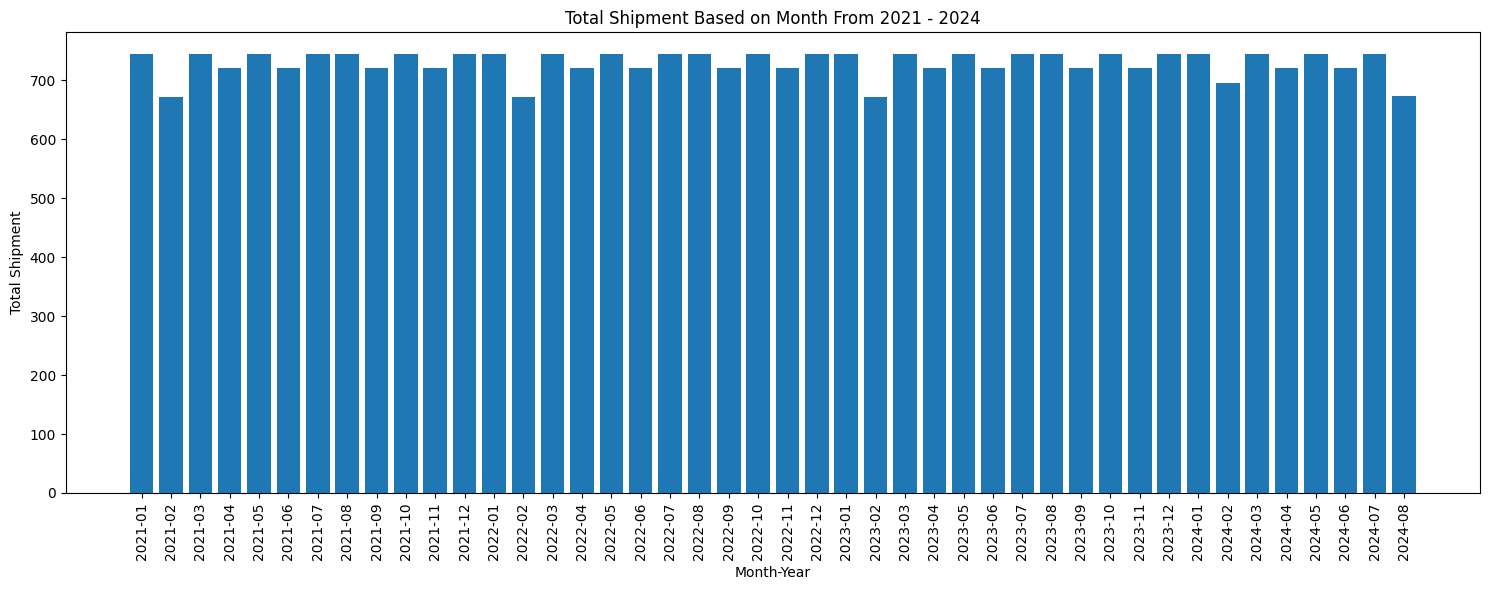

In [10]:
total_shipment = df.groupby('month_shipment').size()
total_shipment

x = total_shipment.index.astype(str)
y = total_shipment.values

plt.figure(figsize=(15,6))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Total Shipment Based on Month From 2021 - 2024')
plt.xlabel('Month-Year')
plt.ylabel('Total Shipment')
plt.tight_layout()

plt.show()

From analysis above, we can see the average of total shipments are above 600 shipments per months. The graph shown for total shipment is quite constant and don't have any months under 600.

However, we can see on **February for each year**, the total shipment was **decrease** compare to other months. This can be caused by the number of days in February only 28 days and 29 days on 2024 (leap year). So it's normal to have lower number of total shipments on that months

### Shipment Delay Trend From 2021 - 2024

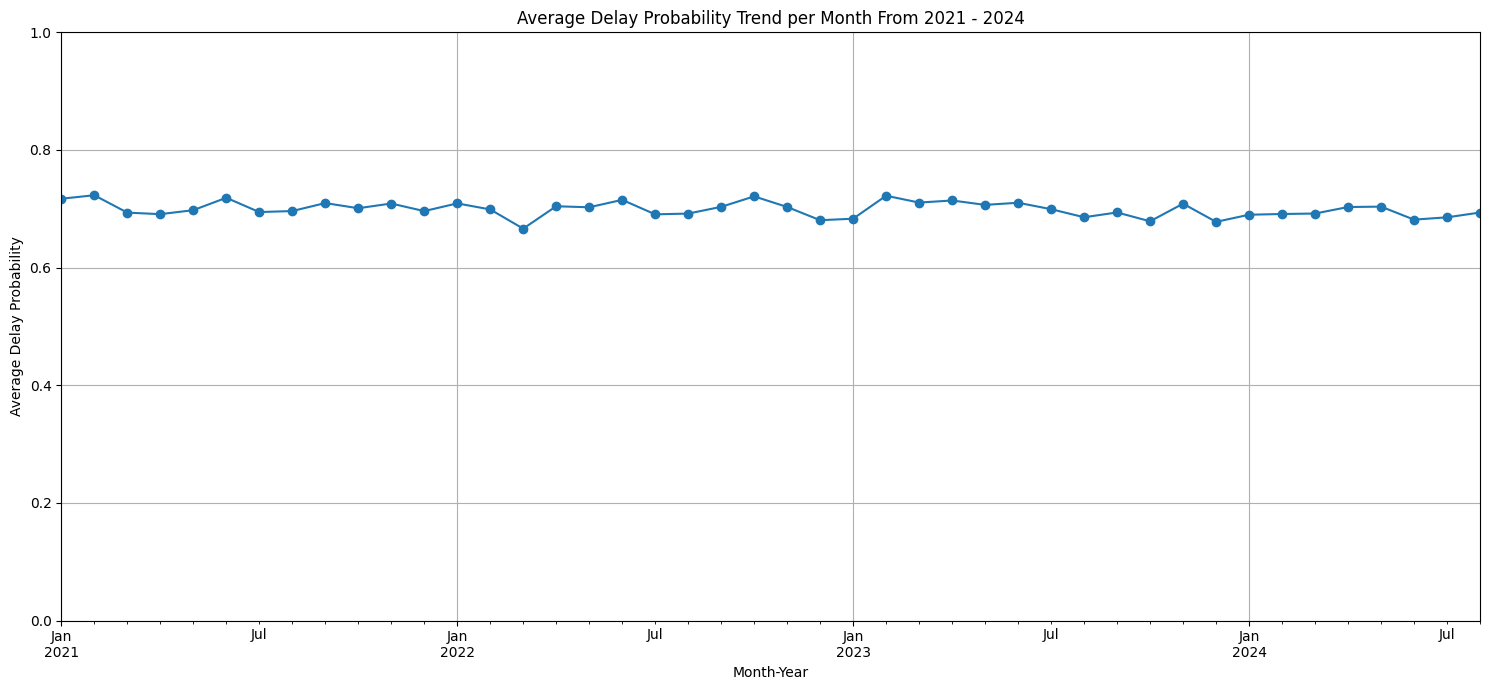

In [11]:
delay_avg = df.groupby('month_shipment')['delay_probability'].mean()

# Buat line chart
plt.figure(figsize=(15, 7))
delay_avg.plot(kind='line', marker='o')
plt.title('Average Delay Probability Trend per Month From 2021 - 2024')
plt.xlabel('Month-Year')
plt.ylabel('Average Delay Probability')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()

plt.show()

The graph for each probability on each months from 2021-2024 also shows a stable performance. The **average range of delay probablity from 2021-2024 is 0.6 - 0.8 (Moderate-High Risk)**. Compare from previous years, the delay trend in 2024 is showing lower probability. Through this analysis, the company aim to decrease the delay by reaching the delay probability to 0 (Low Risk)

## b. Proportion of Each Delay Category

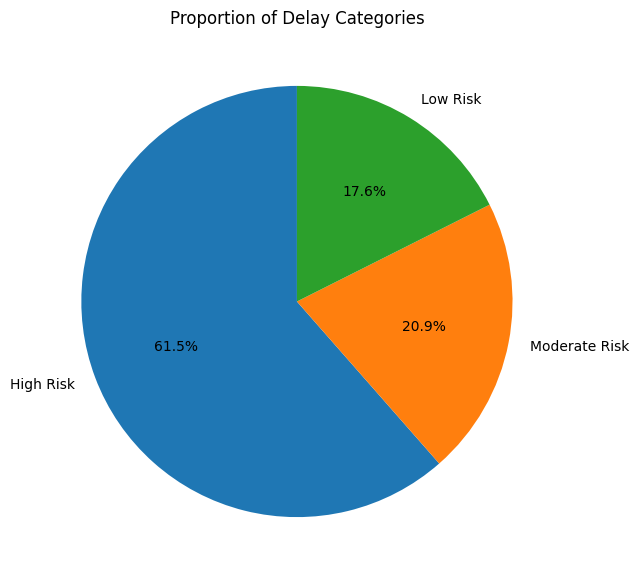

In [12]:
counts_delay = df['delay_category'].value_counts()

# Buat pie chart
plt.figure(figsize=(7,7))
counts_delay.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Delay Categories')
plt.ylabel('')  # supaya label y hilang
plt.show()

From 2021-2024, the company still have High Risk as the highest for Delay probability from all shipments. The low risk still hold the lowest percentage for 17.6%.

For the next visualization, will shows the total shipments from each year that are belongs to High Risk, Moderate Risk, and Low Risk

In [13]:
#Extract to year column and month column

df['month'] = df['month_shipment'].dt.month
df['year'] = df['month_shipment'].dt.year

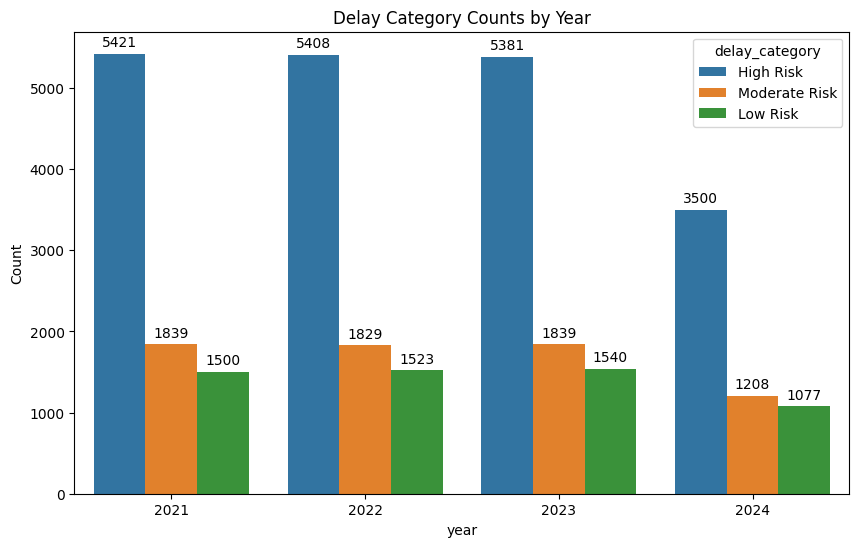

In [14]:
delay_trend = df.groupby('year')['delay_category'].value_counts().reset_index(name='count')

plt.figure(figsize=(10,6))
ax = sns.barplot(x='year', y='count', hue='delay_category', data=delay_trend)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title('Delay Category Counts by Year')
plt.ylabel('Count')
plt.show()

In 2024, the data was recorded until August so the number of total shipments is lower compare to other years.

From this visualization, it shows the number of High Risk delay is decreasing and the number of Low Risk delay is increasing gradually. This trend shows a good progress for the company. Eventhough the Moderate Risk still shows constant trend, the number is almost the same as Low Risk.

Hopefully, the trend for High Risk can keep decreasing and Low Risk can keep increasing on the following years. In measurement of this analysis objective, the percentage of shipment delay is expected to decrease up to 5% in the next year.

## c. Correlation For Each Factors to Delay Probability

In [15]:
#check distribution form skewness
numeric_col = df.select_dtypes(include='number')

listItem= []

for col in numeric_col:
  listItem.append([col, round(df[col].skew(),1), np.where(
    (round(df[col].skew(),1) <= 0.5) & (round(df[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])


skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

nama kolom  nilai skewness distribution
0              vehicle_gps_latitude             0.4       normal
1             vehicle_gps_longitude            -0.4       normal
2             fuel_consumption_rate             1.4       skewed
3               eta_variation_hours            -0.8       skewed
4          traffic_congestion_level             0.0       normal
5         warehouse_inventory_level             0.8       skewed
6            loading_unloading_time             0.4       normal
7   handling_equipment_availability             0.8       skewed
8          order_fulfillment_status            -0.4       normal
9        weather_condition_severity             0.0       normal
10            port_congestion_level            -0.8       skewed
11                   shipping_costs             0.4       normal
12       supplier_reliability_score            -0.0       normal
13                   lead_time_days             0.8       skewed
14                historical_demand            -0.4       normal
15                  iot_temperature             1.4       skewed
16           cargo_condition_status             0.8       skewed
17                 route_risk_level            -0.8       skewed
18           customs_clearance_time             0.4       normal
19            driver_behavior_score             0.0       normal
20         fatigue_monitoring_score            -0.4       normal
21      disruption_likelihood_score            -1.4       skewed
22                delay_probability            -0.8       skewed
23          delivery_time_deviation            -0.4       normal
24                            month             0.1       normal
25                             year             0.1       normal

Since most of columns have normal distribution, so we will use Pearsonr for the statistic correlation test.

In [16]:
# Identify target
target = 'delay_probability'

results = []

for col in numeric_col.columns:
    if col != target:
        corr, p_val = pearsonr(numeric_col[col], numeric_col[target])
        results.append({'Feature': col, 'Pearson Correlation': corr, 'P-Value': p_val})
results_df = pd.DataFrame(results).sort_values(by='P-Value', ignore_index=True)
results_df

Feature  Pearson Correlation   P-Value
0             fuel_consumption_rate            -0.013655  0.014476
1                              year            -0.010572  0.058336
2          order_fulfillment_status             0.009730  0.081451
3             port_congestion_level             0.008972  0.108139
4       disruption_likelihood_score            -0.008175  0.143221
5               eta_variation_hours            -0.006897  0.216856
6              vehicle_gps_latitude            -0.006185  0.268089
7                             month            -0.006006  0.282172
8             vehicle_gps_longitude            -0.005691  0.308176
9           delivery_time_deviation             0.005530  0.322076
10           customs_clearance_time             0.004896  0.380704
11        warehouse_inventory_level             0.004686  0.401392
12            driver_behavior_score            -0.003919  0.482897
13         traffic_congestion_level            -0.003790  0.497344
14                 route_risk_level            -0.003407  0.541844
15           cargo_condition_status             0.002910  0.602305
16                historical_demand            -0.002907  0.602736
17  handling_equipment_availability             0.002690  0.630017
18       supplier_reliability_score             0.001890  0.734988
19       weather_condition_severity             0.001503  0.787813
20                  iot_temperature            -0.001139  0.838407
21                   lead_time_days             0.001083  0.846293
22         fatigue_monitoring_score             0.001070  0.848096
23           loading_unloading_time            -0.000706  0.899393
24                   shipping_costs            -0.000280  0.959982

From analysis with p-value, only `fuel_consumption_rate` and `year` that have p-value < 0.05. In other words, changes in `fuel_consumption_rate` and `year` are likely to influence the delay in a way that is not due to random chance.

This means that statistically, only those columns that have linear correlation with the target. However, further analysis may be needed to assess potential non-linear relationships or interactions between variables.

## d. Weather Severity 

In [17]:
weather_trend = df.groupby(['month'])[['weather_condition_severity', 'delay_probability']].median().reset_index()

weather_trend

month  weather_condition_severity  delay_probability
0       1                    0.513500           0.842997
1       2                    0.508077           0.857876
2       3                    0.507987           0.824866
3       4                    0.492092           0.842677
4       5                    0.507908           0.840223
5       6                    0.526250           0.855040
6       7                    0.480938           0.830136
7       8                    0.495194           0.832737
8       9                    0.453211           0.843152
9      10                    0.492039           0.833101
10     11                    0.483114           0.850654
11     12                    0.486584           0.816204

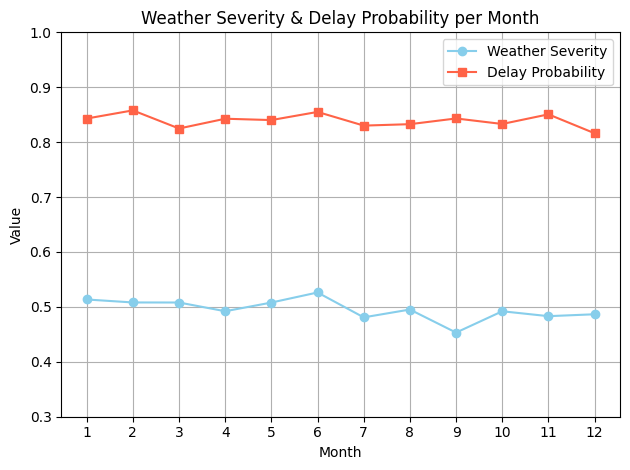

In [18]:
# Garis 1: Weather Severity
plt.plot(weather_trend['month'], weather_trend['weather_condition_severity'], marker='o', label='Weather Severity', color='skyblue')

# Garis 2: Delay Probability
plt.plot(weather_trend['month'], weather_trend['delay_probability'], marker='s', label='Delay Probability', color='tomato')

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Weather Severity & Delay Probability per Month')
plt.xticks(range(1,13))
plt.legend()
plt.ylim(0.3, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

From the chart above, both the weather severity and delay probability show relatively stable trends throughout the year, indicating no significant seasonal spikes affecting the delay. However, during Q3 (June to September), there is a noticeable fluctuation in weather severity. This increase in variability likely corresponds to the extreme weather seasons typically observed in this period, such as summer storms or monsoon conditions depending on the region.

Interestingly, despite the weather severity fluctuating in Q3, the delay probability remains relatively stable, suggesting that delays are not solely driven by weather severity. Eventhough so, operational mitigation strategies can be prepared when entering Q3 period.

## e. Average of Fuel Consumption Rate on Each Delay Category

In [19]:
df_fuel = df[['delay_category', 'fuel_consumption_rate']]

fuel_rate_profile = df_fuel.groupby('delay_category')[['fuel_consumption_rate']]. median()
order = ['Low Risk', 'Moderate Risk', 'High Risk']
fuel_rate_profile = fuel_rate_profile.loc[order]
fuel_rate_profile

fuel_consumption_rate
delay_category                       
Low Risk                     5.726864
Moderate Risk                5.634075
High Risk                    5.614884

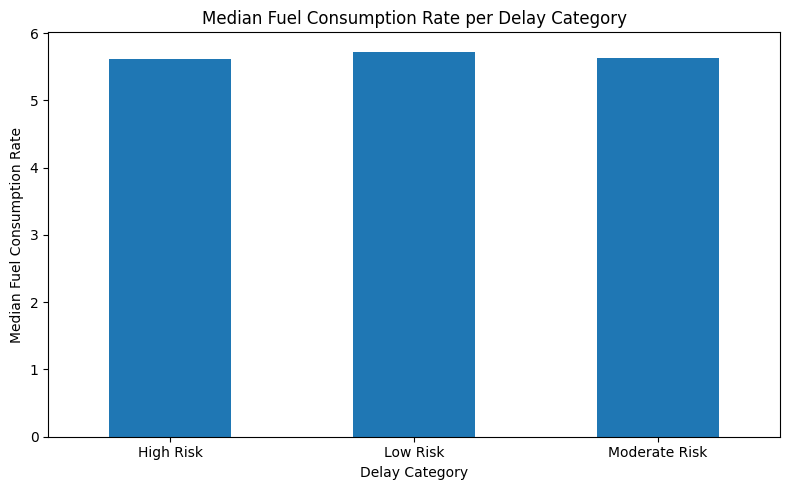

In [20]:
median_per_category = df.groupby('delay_category')['fuel_consumption_rate'].median()

plt.figure(figsize=(8,5))
median_per_category.plot(kind='bar')
plt.title('Median Fuel Consumption Rate per Delay Category')
plt.ylabel('Median Fuel Consumption Rate')
plt.xlabel('Delay Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The bar chart above shows average of fuel consumption based on the risk of delay calculated using median (because data is skewed). As we observed before, the fuel consumption rate are likely to have correlation with delay probability. However, we can see that the fuel consumption on each delay risk category is quite similar —ranging narrowly between approximately 5.61 to 5.73.

This means that fuel consumption rate might contribute to delay probability in combination with other variables, rather than being a strong standalone indicator. The range of variation in fuel consumption may not be large enough across categories to cause significant separation in delay risk.

## f. Delay Probability Based on Risk Classification

In [21]:
#Chi Squared

#1. Make contingency table
contingency_table = pd.crosstab(df['risk_classification'],df['delay_category'])
contingency_table

#2. Chi-Squared Test
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.4862510708348996


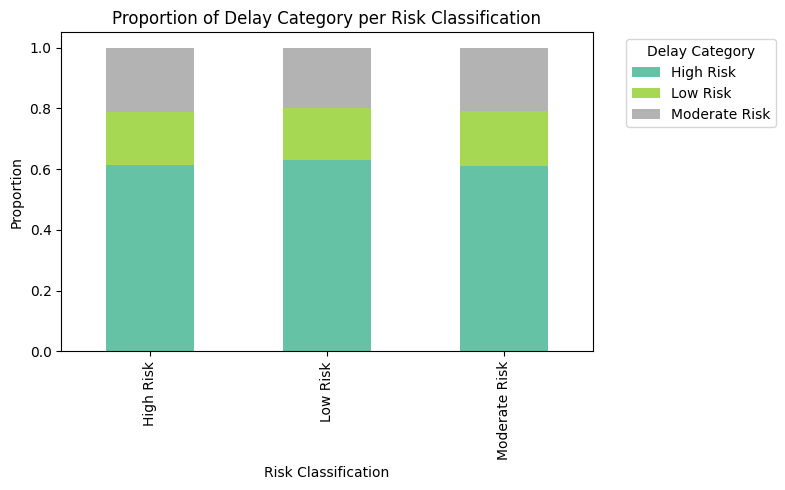

In [22]:
# Crosstab: index = risk_classification, columns = delay_category
crosstab = pd.crosstab(df['risk_classification'], df['delay_category'], normalize='index')

# Plot
crosstab.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 5))
plt.title('Proportion of Delay Category per Risk Classification')
plt.xlabel('Risk Classification')
plt.ylabel('Proportion')
plt.legend(title='Delay Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This analysis aims to compare wheather the delivery risk from Risk Classification is linear with delay risk category. From the chart above, it shows that in every risk classification, the delay risk category is High Risk, followed by Moderate and Low Risk. This pattern is consistent regardless of the initial risk classification level. This indicates that there is no clear linear correlation between the Risk Classification and the Delay Risk Category. In other words, even when the delivery is classified under a lower risk level, the probability of it falling into a High Delay Risk category remains dominant. There may be other contributing factors influencing delay risk that are not captured in the Risk Classification.

## g. Driver Behavior Impact to Delay

In [23]:
#Melihat perbandingan nilai antar cluster

df_driver = df[['delay_category', 'driver_behavior_score', 'fatigue_monitoring_score']]

driver_behaviour_profile = df_driver.groupby('delay_category')[['driver_behavior_score', 'fatigue_monitoring_score']].mean()
order = ['Low Risk', 'Moderate Risk', 'High Risk']
driver_behaviour_profile = driver_behaviour_profile.loc[order]
driver_behaviour_profile


driver_behavior_score  fatigue_monitoring_score
delay_category                                                 
Low Risk                     0.503188                  0.601958
Moderate Risk                0.494607                  0.598412
High Risk                    0.498308                  0.601400

From this analysis, we can see that the low risk delay category have better driver behavior and slightly lower fatigue levels. This suggests that better driving behavior may be associated with a lower risk of delays and lower fatigue levels might correlate slightly with lower delay risks, but the difference is minimal. A good behaviour of driver means they have high level of sompliance when delivery the goods. 

So for further mitigation, company have to make standard operational procedures to ensure that driver have to follow the standard when delivery the goods so the output is driver behaviour score is higher to obtain low risk delay in delivery. 

# VI. Feature Engineering

## a. Memisahkan atara X (Feature) dan Y (Target)

We will drop delay category, risk classification, delivery time deviation, and disruption likelihood score feature since it's also a target column, where delay risk is a category of delay probability and risk classification is one of target category from this dataset. Furthermore, timestamp and month shipment also dropped because it was extracted to month and year columns

In [24]:
X = df.drop(['timestamp','delay_category','risk_classification', 'delay_probability', 'month_shipment', 'delivery_time_deviation', 'disruption_likelihood_score'], axis = 1) #features
y = df['delay_probability'] #target
X

vehicle_gps_latitude  vehicle_gps_longitude  fuel_consumption_rate  \
0                 40.375568             -77.014318               5.136512   
1                 33.507818            -117.036902               5.101512   
2                 30.020640             -75.269224               5.090803   
3                 36.649223             -70.190529               8.219558   
4                 30.001279             -70.012195               5.000075   
...                     ...                    ...                    ...   
32060             48.496665            -104.031158               5.421806   
32061             34.670137             -89.893091              10.624778   
32062             42.963338             -82.149873               5.071596   
32063             32.082410             -70.070154               5.000000   
32064             38.576482             -94.579542               5.000046   

       eta_variation_hours  traffic_congestion_level  \
0                 4.998009                  5.927586   
1                 0.984929                  1.591992   
2                 4.972665                  8.787765   
3                 3.095064                  0.045257   
4                 3.216077                  8.004851   
...                    ...                       ...   
32060             4.394370                  0.192421   
32061             2.700635                  8.736143   
32062             0.485288                  7.420200   
32063             4.759411                  0.932050   
32064             4.068440                  7.156608   

       warehouse_inventory_level  loading_unloading_time  \
0                     985.716862                4.951392   
1                     396.700206                1.030379   
2                     832.408935                4.220229   
3                       0.573283                0.530186   
4                     914.925067                3.620890   
...                          ...                     ...   
32060                 127.684977                3.607803   
32061                  84.638889                1.218165   
32062                  48.500920                4.999149   
32063                 972.437425                0.505242   
32064                  16.669708                2.207746   

       handling_equipment_availability  order_fulfillment_status  \
0                             0.481294                  0.761166   
1                             0.620780                  0.196594   
2                             0.810933                  0.152742   
3                             0.008525                  0.811885   
4                             0.020083                  0.053659   
...                                ...                       ...   
32060                         0.208643                  0.992997   
32061                         0.472389                  0.946031   
32062                         0.064366                  0.437687   
32063                         0.250949                  0.517051   
32064                         0.486014                  0.985761   

       weather_condition_severity  ...  lead_time_days  historical_demand  \
0                        0.359066  ...        2.128009         100.772854   
1                        0.230660  ...       12.608166        5313.738114   
2                        0.027210  ...       14.124452        1595.049146   
3                        0.616619  ...        3.818972        2530.431941   
4                        0.952385  ...       14.001491        2146.190197   
...                           ...  ...             ...                ...   
32060                    0.792648  ...        1.094685         205.682808   
32061                    0.034156  ...        8.320477        1111.961023   
32062                    0.022338  ...        1.212227         600.132813   
32063                    0.782338  ...        6.129439        1354.437588   
32064                   

## b. Memisahkan atara Train Set dan Test Set

In [25]:
#Splitting training & testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (25652, 23)
Test Size (6413, 23)


## c. Check Outliers

In [26]:
num_col = ['vehicle_gps_latitude',
 'vehicle_gps_longitude',
 'fuel_consumption_rate',
 'eta_variation_hours',
 'traffic_congestion_level',
 'warehouse_inventory_level',
 'loading_unloading_time',
 'handling_equipment_availability',
 'order_fulfillment_status',
 'weather_condition_severity',
 'port_congestion_level',
 'shipping_costs',
 'supplier_reliability_score',
 'lead_time_days',
 'historical_demand',
 'iot_temperature',
 'cargo_condition_status',
 'route_risk_level',
 'customs_clearance_time',
 'driver_behavior_score',
 'fatigue_monitoring_score',
 'month',
 'year']
#check distribution form skewness
listItem= []

for col in num_col:
    skew_value = round(X_train[col].skew(), 1)
    dist = 'normal' if -0.5 <= skew_value <= 0.5 else 'skewed'
    listItem.append([col, skew_value, dist])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data=listItem)
skewness

nama kolom  nilai skewness distribution
0              vehicle_gps_latitude             0.4       normal
1             vehicle_gps_longitude            -0.4       normal
2             fuel_consumption_rate             1.4       skewed
3               eta_variation_hours            -0.8       skewed
4          traffic_congestion_level             0.0       normal
5         warehouse_inventory_level             0.8       skewed
6            loading_unloading_time             0.4       normal
7   handling_equipment_availability             0.8       skewed
8          order_fulfillment_status            -0.4       normal
9        weather_condition_severity             0.0       normal
10            port_congestion_level            -0.8       skewed
11                   shipping_costs             0.4       normal
12       supplier_reliability_score            -0.0       normal
13                   lead_time_days             0.8       skewed
14                historical_demand            -0.4       normal
15                  iot_temperature             1.4       skewed
16           cargo_condition_status             0.8       skewed
17                 route_risk_level            -0.8       skewed
18           customs_clearance_time             0.4       normal
19            driver_behavior_score             0.0       normal
20         fatigue_monitoring_score            -0.4       normal
21                            month             0.1       normal
22                             year             0.1       normal

In [27]:
#Check lower and upper boundary, and percentage of total outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

 #1. Mengecek nilai upper dan lower boundary
for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3) 
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)

    #2. Calcultae the percentage of outliers
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

column  upper_boundary  lower_boundary  \
0              vehicle_gps_latitude           58.76           17.23   
1             vehicle_gps_longitude          -38.00         -142.32   
2             fuel_consumption_rate           23.32           -8.70   
3               eta_variation_hours           16.05          -10.01   
4          traffic_congestion_level           15.60           -5.61   
5         warehouse_inventory_level         2114.01        -1557.68   
6            loading_unloading_time            6.96           -2.37   
7   handling_equipment_availability            2.15           -1.58   
8          order_fulfillment_status            1.64           -0.43   
9        weather_condition_severity            1.56           -0.56   
10            port_congestion_level           25.79          -11.42   
11                   shipping_costs         1398.04         -477.78   
12       supplier_reliability_score            1.56           -0.56   
13                   lead_time_days           31.04          -21.12   
14                historical_demand        16304.30        -4260.98   
15                  iot_temperature           53.97          -57.86   
16           cargo_condition_status            2.11           -1.56   
17                 route_risk_level           25.45          -10.98   
18           customs_clearance_time            6.97           -2.37   
19            driver_behavior_score            1.56           -0.56   
20         fatigue_monitoring_score            1.64           -0.44   
21                            month           16.20           -3.91   
22                             year         2025.56         2019.16   

    percentage_total_outlier  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
5                        0.0  
6                        0.0  
7                        0.0  
8                        0.0  
9                        0.0  
10                       0.0  
11                       0.0  
12                       0.0  
13                       0.0  
14                       0.0  
15                       0.0  
16                       0.0  
17                       0.0  
18                       0.0  
19                       0.0  
20                       0.0  
21                       0.0  
22                       0.0

From the analysis of outliers, after we count the percentage of outliers, all data shows 0% of outliers. So we will skip the outlier handling process

## d. Feature Selection

### Check Assumption : Correlation Feature to Target

In [80]:
p_values = []
r_values = []
interpretasi = []
cols = []

#Membuat conditional untuk menghitung tau dan p-value
for col in X_train.columns:
  corr_coef, p_value = pearsonr(X_train[col], y_train)

  p_values.append(p_value)
  r_values.append(corr_coef)
  cols.append(col)

  if p_value < 0.05 :
    interpretasi.append('have correlation')
  else :
    interpretasi.append('no correlation')

pd.DataFrame({'nama kolom':cols,
              'r': r_values,
              'p-value': p_values,
              'hasil': interpretasi})

nama kolom         r   p-value             hasil
0              vehicle_gps_latitude -0.008605  0.168142    no correlation
1             vehicle_gps_longitude -0.007594  0.223887    no correlation
2             fuel_consumption_rate -0.022482  0.000317  have correlation
3               eta_variation_hours -0.001402  0.822341    no correlation
4          traffic_congestion_level -0.004819  0.440283    no correlation
5         warehouse_inventory_level  0.000741  0.905527    no correlation
6            loading_unloading_time -0.002206  0.723861    no correlation
7   handling_equipment_availability  0.001880  0.763300    no correlation
8          order_fulfillment_status  0.004629  0.458469    no correlation
9        weather_condition_severity  0.004153  0.505989    no correlation
10            port_congestion_level  0.010159  0.103728    no correlation
11                   shipping_costs  0.004181  0.503147    no correlation
12       supplier_reliability_score  0.001738  0.780699    no correlation
13                   lead_time_days -0.001021  0.870118    no correlation
14                historical_demand -0.004510  0.470114    no correlation
15                  iot_temperature -0.006082  0.329985    no correlation
16           cargo_condition_status  0.002830  0.650391    no correlation
17                 route_risk_level -0.001567  0.801834    no correlation
18           customs_clearance_time  0.008298  0.183835    no correlation
19            driver_behavior_score -0.003352  0.591414    no correlation
20         fatigue_monitoring_score  0.003582  0.566201    no correlation
21                            month -0.002990  0.632012    no correlation
22                             year -0.015261  0.014517  have correlation

From the correlation analysis, most of the columns have no correlation with the target. However, we will try to use all columns first and check the performace during the modeling steps. 

### Check Assumption 2 : No or Little Multicollinearity

In [29]:
#Assumption 2 : No or Little Multicollinearity (part 1)

#Membuat dataframe kolom numerik utk uji VIF
X_train_vif = X_train[num_col]


def calc_vif(X_train_vif):
    vif = pd.DataFrame()
    vif["variables"] = X_train_vif.columns
    vif["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

    return(vif)

vif = calc_vif(X_train_vif)
vif


variables         VIF
0              vehicle_gps_latitude   31.159300
1             vehicle_gps_longitude   27.915401
2             fuel_consumption_rate    4.532075
3               eta_variation_hours    2.603546
4          traffic_congestion_level    2.999209
5         warehouse_inventory_level    1.856376
6            loading_unloading_time    3.182417
7   handling_equipment_availability    1.865416
8          order_fulfillment_status    4.046126
9        weather_condition_severity    2.993501
10            port_congestion_level    5.614503
11                   shipping_costs    3.168801
12       supplier_reliability_score    3.005085
13                   lead_time_days    2.341682
14                historical_demand    4.089367
15                  iot_temperature    1.000789
16           cargo_condition_status    1.856331
17                 route_risk_level    5.703526
18           customs_clearance_time    3.185006
19            driver_behavior_score    2.987656
20         fatigue_monitoring_score    4.014351
21                            month    4.362949
22                             year  103.928000

From checking the 2nd assumption of Multicollinearity, we can see that column 'vehicle_gps_latitude', 'vehicle_gps_longitude', and 'year' are the  3 with highest VIF Score. However, year columns shows correlation statistically with the target, so the year column wont be dropped since we only have 2 features that have correlation with the target.

In [30]:
#Assumption 2 : No or Little Multicollinearity (part 2)

num_col_final = [
 'fuel_consumption_rate',
 'eta_variation_hours',
 'traffic_congestion_level',
 'warehouse_inventory_level',
 'loading_unloading_time',
 'handling_equipment_availability',
 'order_fulfillment_status',
 'weather_condition_severity',
 'port_congestion_level',
 'shipping_costs',
 'supplier_reliability_score',
 'lead_time_days',
 'historical_demand',
 'iot_temperature',
 'cargo_condition_status',
 'route_risk_level',
 'customs_clearance_time',
 'driver_behavior_score',
 'fatigue_monitoring_score',
 'month', 'year']

#Membuat dataframe kolom numerik utk uji VIF
X_train_2 = X_train[num_col_final]


def calc_vif(X_train_2):
    vif = pd.DataFrame()
    vif["variables"] = X_train_2.columns
    vif["VIF"] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]

    return(vif)

vif = calc_vif(X_train_2)
vif

variables        VIF
0             fuel_consumption_rate   4.532051
1               eta_variation_hours   2.603419
2          traffic_congestion_level   2.999070
3         warehouse_inventory_level   1.856341
4            loading_unloading_time   3.182230
5   handling_equipment_availability   1.865354
6          order_fulfillment_status   4.045986
7        weather_condition_severity   2.993187
8             port_congestion_level   5.614071
9                    shipping_costs   3.168706
10       supplier_reliability_score   3.004694
11                   lead_time_days   2.341633
12                historical_demand   4.088890
13                  iot_temperature   1.000736
14           cargo_condition_status   1.856296
15                 route_risk_level   5.702076
16           customs_clearance_time   3.184945
17            driver_behavior_score   2.987419
18         fatigue_monitoring_score   4.013893
19                            month   4.361789
20                             year  46.388078

From 2nd attemp, we can see that the VIF scores from all columns except year are not high and under 10. Year score also decrease from the 2nd attempt test. So for the analysis, will use all columns from from the 2nd Attempt of VIF Score.

In [31]:
#Drop columns latitude and longitude for test data as well
X_test_2 = X_test[num_col_final]

## e. Preprocessing

For the preprocessing, we will use pipeline for feature scaling. Scaler that will be used are StandarScaler because most of the is distributed normally and don't have outliers.

In [32]:
scale = Pipeline ([('scaling', StandardScaler())])
preprocessing = ColumnTransformer([('numerical', scale, num_col_final)])

In [33]:
# Fit to train
preprocessing.fit(X_train_2, y_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 ['fuel_consumption_rate',
                                  'eta_variation_hours',
                                  'traffic_congestion_level',
                                  'warehouse_inventory_level',
                                  'loading_unloading_time',
                                  'handling_equipment_availability',
                                  'order_fulfillment_status',
                                  'weather_condition_severity',
                                  'port_congestion_level', 'shipping_costs',
                                  'supplier_reliability_score',
                                  'lead_time_days', 'historical_demand',
                                  'iot_temperature', 'cargo_condition_status',
                                  'route_risk_level', 'customs_clearance_time',
                                  'driver_behavior_score',
                                  'fatigue_monitoring_score', 'month',
                                  'year'])])

# VII. Modelling

For the model evaluation, will be used MAE as metrics to determine whether the model is good fit, underfit, or overfit. Additionally, will be added R2 score to check the accuration of the models.

## A. KNeighborsRegressor

### i. Model Definition

In [34]:
#Model pipeline KNeighborsRegressor
knreg_pipeline = Pipeline([('preprocessing', preprocessing), ('KNeighborsRegressor', KNeighborsRegressor())])

### ii. Model Training

In [35]:
knreg_pipeline.fit(X_train_2, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['fuel_consumption_rate',
                                                   'eta_variation_hours',
                                                   'traffic_congestion_level',
                                                   'warehouse_inventory_level',
                                                   'loading_unloading_time',
                                                   'handling_equipment_availability',
                                                   'order_fulfillment_status',
                                                   'weather_condition_severity',
                                                   'port_congestion_level',
                                                   'shipping_costs',
                                                   'supplier_reliability_score',
                                                   'lead_time_days',
                                                   'historical_demand',
                                                   'iot_temperature',
                                                   'cargo_condition_status',
                                                   'route_risk_level',
                                                   'customs_clearance_time',
                                                   'driver_behavior_score',
                                                   'fatigue_monitoring_score',
                                                   'month', 'year'])])),
                ('KNeighborsRegressor', KNeighborsRegressor())])

In [36]:
#Predict with train and test

y_pred_train_knreg = knreg_pipeline.predict(X_train_2) 
y_pred_test_knreg = knreg_pipeline.predict(X_test_2)


c:\Users\WANDA\miniconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\WANDA\miniconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\WANDA\miniconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\WANDA\miniconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\WANDA\miniconda3\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


### iii. Model Evaluation

In [37]:
#Menghitung Nilai Training dg MSE
mae_train = mean_absolute_error(y_train, y_pred_train_knreg)
mae_test = mean_absolute_error(y_test, y_pred_test_knreg)

print (f'Nilai MAE Train KNeighborsRegressor: {mae_train:.2f}')
print (f'Nilai MAE Test KNeighborsRegressor: {mae_test:.2f}')

#Menghitung Nilai Training dg R2
r2_train = r2_score(y_train, y_pred_train_knreg)
r2_test = r2_score(y_test, y_pred_test_knreg)

print (f'Nilai R2 Score Train KNeighborsRegressor: {r2_train:.2f}')
print (f'Nilai R2 Score Test KNeighborsRegressor: {r2_test:.2f}')


Nilai MAE Train KNeighborsRegressor: 0.24
Nilai MAE Test KNeighborsRegressor: 0.30
Nilai R2 Score Train KNeighborsRegressor: 0.21
Nilai R2 Score Test KNeighborsRegressor: -0.20


From the model evaluation, we conclude that the MAE shows quite high value (if compare to 1.0). The MAE of train is 0.24 and test is 0.30 means model prediction missed almost 30% of actual delay probability.

For the R2 score, on the test it shows negative value. This means that he model can be arbitrarily worse. A constant model that always predicts the average target disregarding the input features would get a score of r2 minimum 0.0.

The score of train and test also inidacting there is **an underfit** using this model, because the MAE score in test is bigger compare in train, have higher error percentage and r2 score relative low.


In [38]:
# Cross Validation using `cross_val_score`

mae_train_cross_val = cross_val_score(knreg_pipeline,
                                     X_train_2,
                                     y_train,
                                     cv=5,
                                     scoring="neg_mean_absolute_error")
mae_train_cross_val = -mae_train_cross_val

print('MAE Score - All - Cross Validation  : ', mae_train_cross_val)
print('MAE Score - Mean - Cross Validation : ', mae_train_cross_val.mean())
print('MAE Score - Std - Cross Validation  : ', mae_train_cross_val.std())
print('MAE Score - Range of Train-Set       : ', (mae_train_cross_val.mean()-mae_train_cross_val.std()) , '-', (mae_train_cross_val.mean()+mae_train_cross_val.std()))

MAE Score - All - Cross Validation  :  [0.29619088 0.2924342  0.28813846 0.28773263 0.29140771]
MAE Score - Mean - Cross Validation :  0.291180777672455
MAE Score - Std - Cross Validation  :  0.003094159984102122
MAE Score - Range of Train-Set       :  0.28808661768835286 - 0.2942749376565571


After testing the cross validation, from 5 fold we can see that the cross validation shows stable value from 28%-29% with the mean 29%. The standard deviation also give small value which is 0.3%.

This means that KNeighborRegressors shows good consitency and have stable performance across different data subsets.

In [39]:
#Check residuals

# Get residuals
y_test_residuals = y_test - y_pred_test_knreg
y_test_residuals

# Perform Durbin-Watson test
durbin_watson(y_test_residuals)

np.float64(1.9944078329699222)

Based on Durbin watson test to check No-Auto Correlation, we got the score is 1.99 or ~2. This score is on the range of 1.5 - 2.0, so we can assume autocorrelation is not a problem in this model and model residuals are independent.

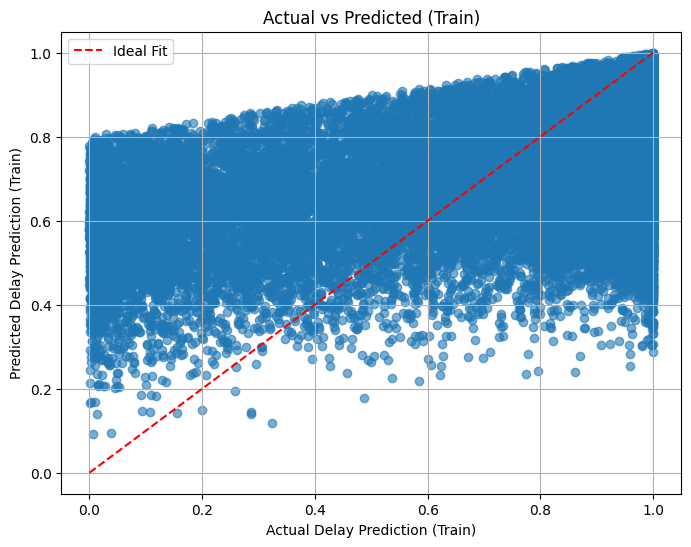

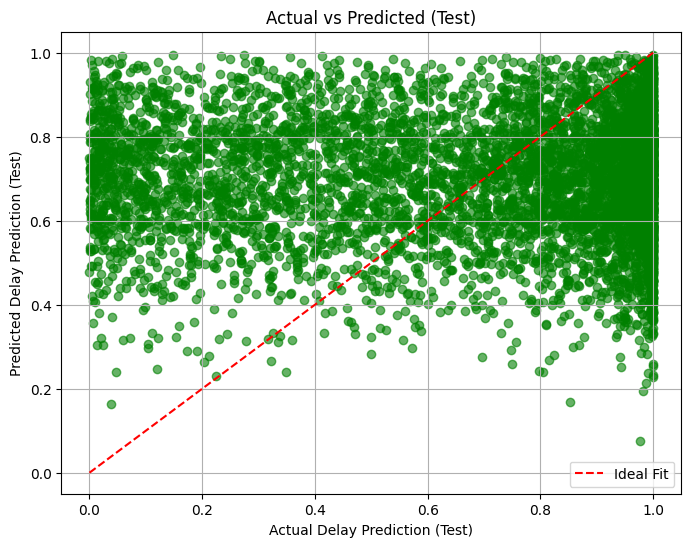

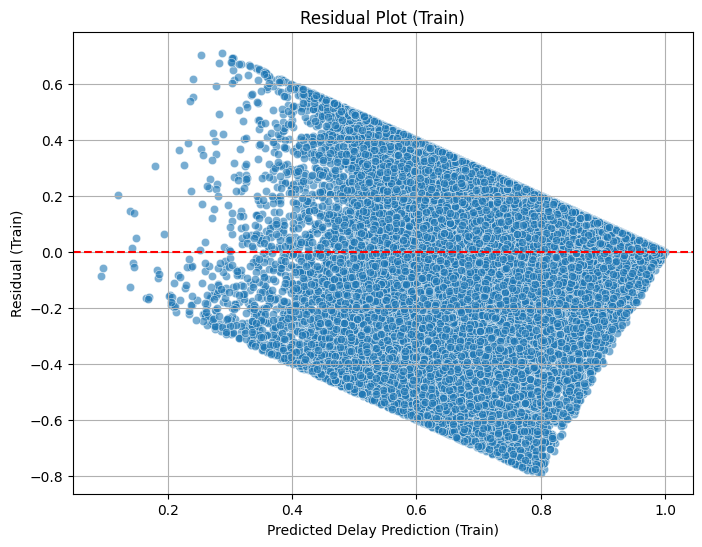

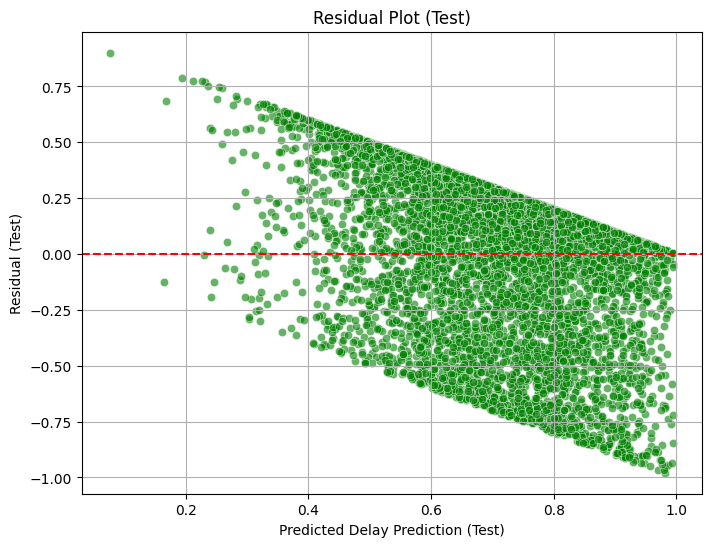

In [40]:
plt.rcParams['figure.figsize'] = (8, 6)

# Actual vs Predicted (Train)
plt.figure()
plt.scatter(y_train, y_pred_train_knreg, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Delay Prediction (Train)')
plt.ylabel('Predicted Delay Prediction (Train)')
plt.title('Actual vs Predicted (Train)')
plt.legend()
plt.grid(True)
plt.show()

# Actual vs Predicted (Test)
plt.figure()
plt.scatter(y_test, y_pred_test_knreg, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Delay Prediction (Test)')
plt.ylabel('Predicted Delay Prediction (Test)')
plt.title('Actual vs Predicted (Test)')
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot (Train)
residual_train = y_train - y_pred_train_knreg

plt.figure()
sns.scatterplot(x=y_pred_train_knreg, y=residual_train, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Delay Prediction (Train)')
plt.ylabel('Residual (Train)')
plt.title('Residual Plot (Train)')
plt.grid(True)
plt.show()

# Residual Plot (Test)
residual_test = y_test - y_pred_test_knreg

plt.figure()
sns.scatterplot(x=y_pred_test_knreg, y=residual_test, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Delay Prediction (Test)')
plt.ylabel('Residual (Test)')
plt.title('Residual Plot (Test)')
plt.grid(True)
plt.show()


From the model visualization above, we can conclude that:

- For both train and test, all plots are scattered and located widely from the ideal line (red line). This indicates that the model tends to perform underpredict (predicted value is smaller than actual).
- For the test data, it shows wider scatter --> the model does not generalize well to new data.
- For the residual plot on train and test, all plots are scattered widely from the horizontal line (red line)
- The residuals appear to have a downward sloping linear pattern --> a strong indication that the model has not captured the true relationship (it could be a non-linear relationship).

**Global Conclusion**

- KNeighborRegressors models prediction missed ~30% from actual prediction and shows **underfitting** because the MAE score is quite high (reach almost 30%) and R2 score relatively low (and even give negative score).
- However the R2 score gives negative value on the test, means the model is arbitrarily worse.
- The plot of train and test also show wider scatter from the ideal line (red line). This indicates that the model tends to perform underpredict
- For the residual appear to have a downward sloping linear pattern
- Eventhough Dublin watson gives a good score (~2), but the residual plot still shows a non-random pattern means this is not an autocorrelation 

**Advantage of KNeighborRegressor**
- Have stable performance and good consistency in making prediction.

**Disdvantage of KNeighborRegressor**
- Have neagative r2 Score and underfitting --> The model cannot explain the variation in the data well.
- There is a triangular pattern and the residuals are not randomly distributed --> indicating that model failed to capture the relationship between features and targets.

## B. SVM - SVR

### i. Model Definition

In [41]:
#Model pipeline SVR
svr_pipeline = Pipeline([('preprocessing', preprocessing), ('SVR', SVR())])

### ii. Model Training

In [42]:
svr_pipeline.fit(X_train_2, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['fuel_consumption_rate',
                                                   'eta_variation_hours',
                                                   'traffic_congestion_level',
                                                   'warehouse_inventory_level',
                                                   'loading_unloading_time',
                                                   'handling_equipment_availability',
                                                   'order_fulfillment_status',
                                                   'weather_condition_severity',
                                                   'port_congestion_level',
                                                   'shipping_costs',
                                                   'supplier_reliability_score',
                                                   'lead_time_days',
                                                   'historical_demand',
                                                   'iot_temperature',
                                                   'cargo_condition_status',
                                                   'route_risk_level',
                                                   'customs_clearance_time',
                                                   'driver_behavior_score',
                                                   'fatigue_monitoring_score',
                                                   'month', 'year'])])),
                ('SVR', SVR())])

In [43]:
#Predict with train and test

y_pred_train_svr = svr_pipeline.predict(X_train_2) 
y_pred_test_svr = svr_pipeline.predict(X_test_2)

### iii. Model Evaluation

In [44]:
#Menghitung Nilai Training dg MSE
mae_train = mean_absolute_error(y_train, y_pred_train_svr)
mae_test = mean_absolute_error(y_test, y_pred_test_svr)

print (f'Nilai MAE Train SVR: {mae_train:.2f}')
print (f'Nilai MAE Test SVR: {mae_test:.2f}')

#Menghitung Nilai Training dg R2
r2_train = r2_score(y_train, y_pred_train_svr)
r2_test = r2_score(y_test, y_pred_test_svr)

print (f'Nilai R2 Score Train SVR: {r2_train:.2f}')
print (f'Nilai R2 Score Test SVR: {r2_test:.2f}')


Nilai MAE Train SVR: 0.20
Nilai MAE Test SVR: 0.28
Nilai R2 Score Train SVR: 0.29
Nilai R2 Score Test SVR: -0.15


From the model evaluation, we conclude that the MAE shows quite high value (if compare to 1.0). The MAE of train is 0.20 and test is 0.28 means model prediction missed almost 20-30% of actual delay probability. Even though so, the MAE score is quite low from the KNeighborRegression.

For the R2 score, on the test it shows negative value. This means that he model can be arbitrarily worse. A constant model that always predicts the average target disregarding the input features would get a score of r2 minimum 0.0.

The score of train and test also inidacting there is **an underfit** using this model, because the MAE score in test is bigger compare in train, have higher error percentage and r2 score relative low.

In [45]:
# Cross Validation using `cross_val_score`

mae_train_cross_val = cross_val_score(svr_pipeline,
                                     X_train_2,
                                     y_train,
                                     cv=5,
                                     scoring="neg_mean_absolute_error")
mae_train_cross_val = -mae_train_cross_val

print('MAE Score - All - Cross Validation  : ', mae_train_cross_val)
print('MAE Score - Mean - Cross Validation : ', mae_train_cross_val.mean())
print('MAE Score - Std - Cross Validation  : ', mae_train_cross_val.std())
print('MAE Score - Range of Train-Set       : ', (mae_train_cross_val.mean()-mae_train_cross_val.std()) , '-', (mae_train_cross_val.mean()+mae_train_cross_val.std()))

MAE Score - All - Cross Validation  :  [0.27948107 0.27736576 0.2744175  0.27367397 0.2772748 ]
MAE Score - Mean - Cross Validation :  0.27644262070752135
MAE Score - Std - Cross Validation  :  0.002123366103649833
MAE Score - Range of Train-Set       :  0.2743192546038715 - 0.2785659868111712


After testing the cross validation, from 5 fold we can see that the cross validation shows stable value from 27% with the mean 27%. The standard deviation also give small value which is 0.2%. The cross validation on SVR shows better cross validation score compare to KNeighborRegressor.

This means that SVR shows good consitency and have stable performance across different data subsets.

In [46]:
#Check residuals

# Get residuals
y_test_residuals = y_test - y_pred_test_svr
y_test_residuals

# Perform Durbin-Watson test
durbin_watson(y_test_residuals)

np.float64(1.9117042382196225)

Based on Durbin watson test to check No-Auto Correlation, we got the score is 1.91 or ~2. This score is on the range of 1.5 - 2.0, so we can assume autocorrelation is not a problem in this model and model residuals are independent.

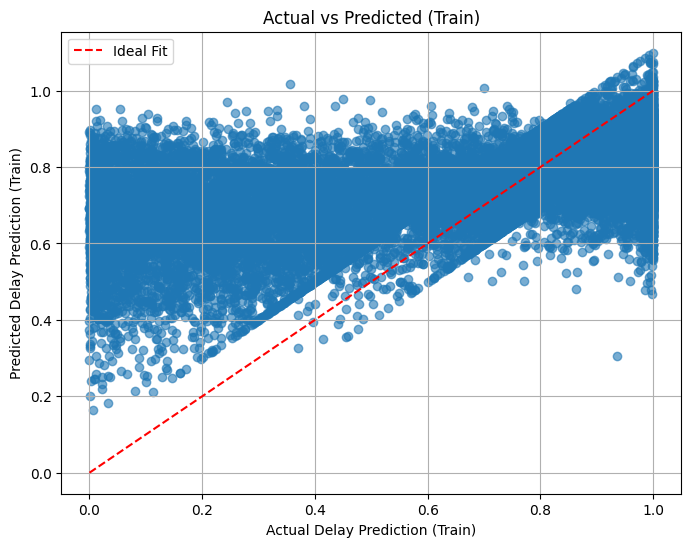

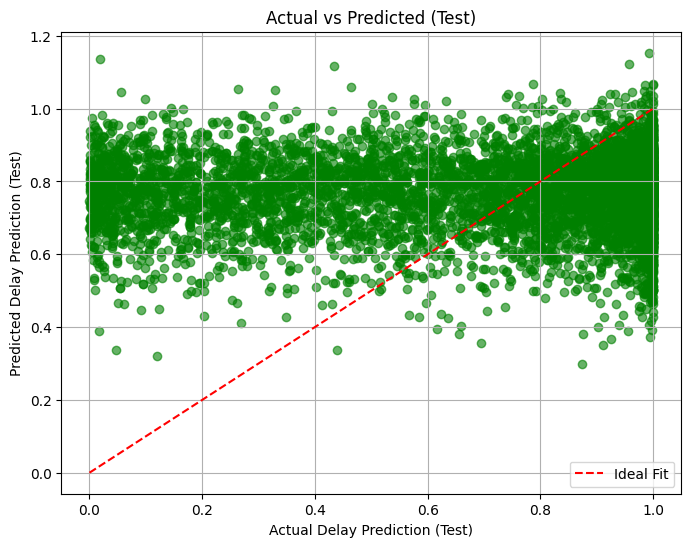

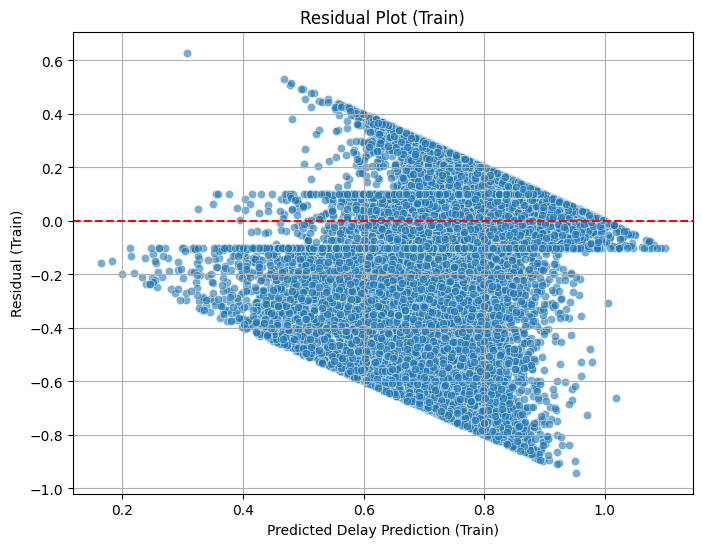

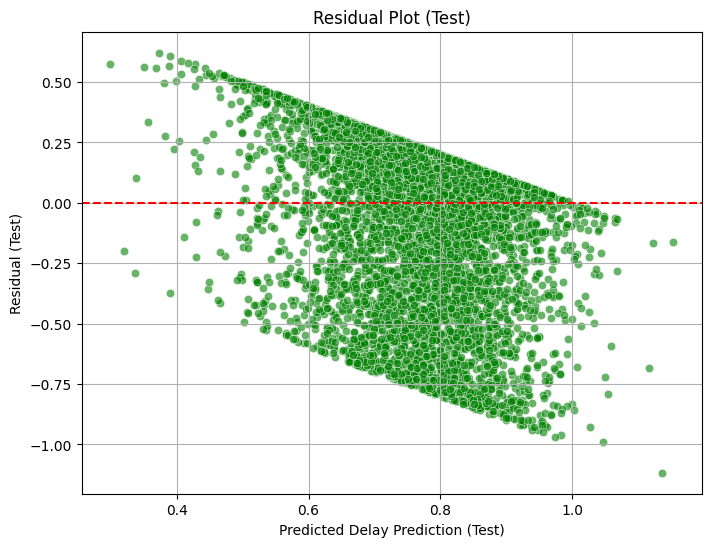

In [47]:
plt.rcParams['figure.figsize'] = (8, 6)

# Actual vs Predicted (Train)
plt.figure()
plt.scatter(y_train, y_pred_train_svr, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Delay Prediction (Train)')
plt.ylabel('Predicted Delay Prediction (Train)')
plt.title('Actual vs Predicted (Train)')
plt.legend()
plt.grid(True)
plt.show()

# Actual vs Predicted (Test)
plt.figure()
plt.scatter(y_test, y_pred_test_svr, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Delay Prediction (Test)')
plt.ylabel('Predicted Delay Prediction (Test)')
plt.title('Actual vs Predicted (Test)')
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot (Train)
residual_train = y_train - y_pred_train_svr

plt.figure()
sns.scatterplot(x=y_pred_train_svr, y=residual_train, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Delay Prediction (Train)')
plt.ylabel('Residual (Train)')
plt.title('Residual Plot (Train)')
plt.grid(True)
plt.show()

# Residual Plot (Test)
residual_test = y_test - y_pred_test_svr

plt.figure()
sns.scatterplot(x=y_pred_test_svr, y=residual_test, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Delay Prediction (Test)')
plt.ylabel('Residual (Test)')
plt.title('Residual Plot (Test)')
plt.grid(True)
plt.show()


From the model visualization above, we can conclude that:

- For both train and test, all plots are scattered and located widely from the ideal line (red line). This indicates that the model tends to perform underpredict (predicted value is smaller than actual).
- The visualization on train show a better scatter, because it has pattern that distributed randomly near the ideal line, eventhough still have many plots that scatter widely.
- For the test data, it shows wider scatter --> the model does not generalize well to new data. However, the scatter is not as wide as in KNeighborRegressor
- For the residual plot on train and test, all plots are scattered widely from the horizontal line (red line)
- The residuals appear to have a downward sloping linear pattern --> a strong indication that the model has not captured the true relationship (it could be a non-linear relationship).

**Global Conclusion**

- SVR models prediction missed ~20-30% from actual prediction and shows **underfitting** because the MAE score is quite high (reach almost 30%) and R2 score relatively low (and even give negative score).
- The R2 score gives negative value on the test, means the model is arbitrarily worse.
- The plot of train and test also show wider scatter from the ideal line (red line). This indicates that the model tends to perform underpredict
- For the residual appear to have a downward sloping linear pattern
- Eventhough Dublin watson gives a good score (~2), but the residual plot still shows a non-random pattern means this is not an autocorrelation 

**Advantage of SVR**
- Have more stable performance and good consistency in making prediction compare to KNeighborRegressor

**Disdvantage of SVR**
- Model running takes quite long time and not suitable for dataset that have a lot of rows and columns 
- Have neagative r2 Score and underfitting --> The model cannot explain the variation in the data well.
- There is a triangular pattern and the residuals are not randomly distributed --> indicating that model failed to capture the relationship between features and targets.

## C. Decision Tree

### i. Model Definition

In [48]:
#Model pipeline Decision Tree
tree_pipeline = Pipeline([('preprocessing', preprocessing), ('DecisionTreeRegressor', DecisionTreeRegressor())])

### ii. Model Training

In [49]:
tree_pipeline.fit(X_train_2, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['fuel_consumption_rate',
                                                   'eta_variation_hours',
                                                   'traffic_congestion_level',
                                                   'warehouse_inventory_level',
                                                   'loading_unloading_time',
                                                   'handling_equipment_availability',
                                                   'order_fulfillment_status',
                                                   'weather_condition_severity',
                                                   'port_congestion_level',
                                                   'shipping_costs',
                                                   'supplier_reliability_score',
                                                   'lead_time_days',
                                                   'historical_demand',
                                                   'iot_temperature',
                                                   'cargo_condition_status',
                                                   'route_risk_level',
                                                   'customs_clearance_time',
                                                   'driver_behavior_score',
                                                   'fatigue_monitoring_score',
                                                   'month', 'year'])])),
                ('DecisionTreeRegressor', DecisionTreeRegressor())])

In [50]:
#Predict with train and test

y_pred_train_tree = tree_pipeline.predict(X_train_2) 
y_pred_test_tree = tree_pipeline.predict(X_test_2)

### iii. Model Evaluation

In [51]:
#Menghitung Nilai Training dg MSE
mae_train = mean_absolute_error(y_train, y_pred_train_tree)
mae_test = mean_absolute_error(y_test, y_pred_test_tree)

print (f'Nilai MAE Train Decision Tree: {mae_train:.2f}')
print (f'Nilai MAE Test Decision Tree: {mae_test:.2f}')

#Menghitung Nilai Training dg R2
r2_train = r2_score(y_train, y_pred_train_tree)
r2_test = r2_score(y_test, y_pred_test_tree)

print (f'Nilai R2 Score Train Decision Tree: {r2_train:.2f}')
print (f'Nilai R2 Score Test Decision Tree: {r2_test:.2f}')

Nilai MAE Train Decision Tree: 0.00
Nilai MAE Test Decision Tree: 0.35
Nilai R2 Score Train Decision Tree: 1.00
Nilai R2 Score Test Decision Tree: -0.98


From the model evaluation, we conclude that the MAE in test shows quite high value but in train is 0.00. The MAE of test is 0.36 means model prediction missed 36%` of actual delay probability. This means that the model perform very bad in test.

In the train the R2 score gives very good score which is 1.00 but the test is negative. For the R2 score, on the test it shows negative value. This means that the model can be arbitrarily worse in the test. 

The score of train and test also inidacting there is **an overfit** using this model, because the MAE score in test is high but the train is 0.00 and r2 score relative low.

In [52]:
# Cross Validation using `cross_val_score`

mae_train_cross_val = cross_val_score(tree_pipeline,
                                     X_train_2,
                                     y_train,
                                     cv=5,
                                     scoring="neg_mean_absolute_error")
mae_train_cross_val = -mae_train_cross_val

print('MAE Score - All - Cross Validation  : ', mae_train_cross_val)
print('MAE Score - Mean - Cross Validation : ', mae_train_cross_val.mean())
print('MAE Score - Std - Cross Validation  : ', mae_train_cross_val.std())
print('MAE Score - Range of Train-Set       : ', (mae_train_cross_val.mean()-mae_train_cross_val.std()) , '-', (mae_train_cross_val.mean()+mae_train_cross_val.std()))

MAE Score - All - Cross Validation  :  [0.35633747 0.35167358 0.34463208 0.34963246 0.35883092]
MAE Score - Mean - Cross Validation :  0.352221302025038
MAE Score - Std - Cross Validation  :  0.005004560950380875
MAE Score - Range of Train-Set       :  0.3472167410746571 - 0.35722586297541886


After testing the cross validation, from 5 fold we can see that the cross validation shows value from 34% - 37% with the mean 35%. The standard deviation also give small value which is 0.4%. However the score is vary quite far from the train. On the train evaluation, the score is 0.00 but when check the cross validation, the score gives almost the same as the test. This means that model is not robust and poorly simulate model performance on data it has never seen before.

In [53]:
#Check residuals

# Get residuals
y_test_residuals = y_test - y_pred_test_tree
y_test_residuals

# Perform Durbin-Watson test
durbin_watson(y_test_residuals)

np.float64(1.9804371798695901)

Based on Durbin watson test to check No-Auto Correlation, we got the score is 1.99 or ~2. This score is on the range of 1.5 - 2.0, so we can assume autocorrelation is not a problem in this model and model residuals are independent.

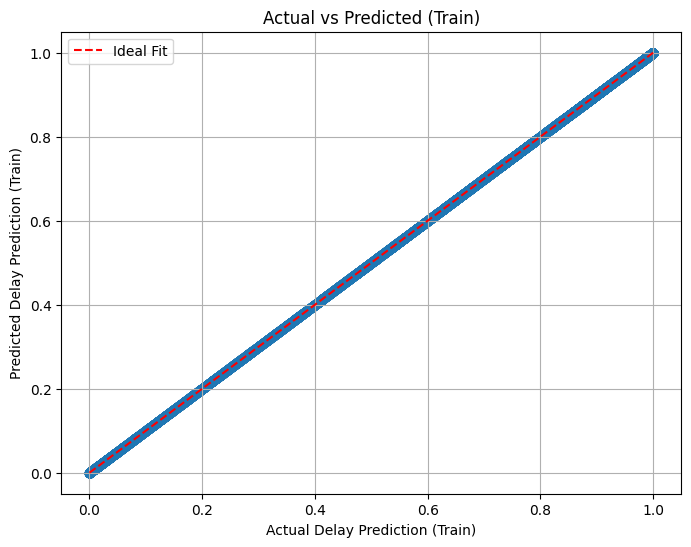

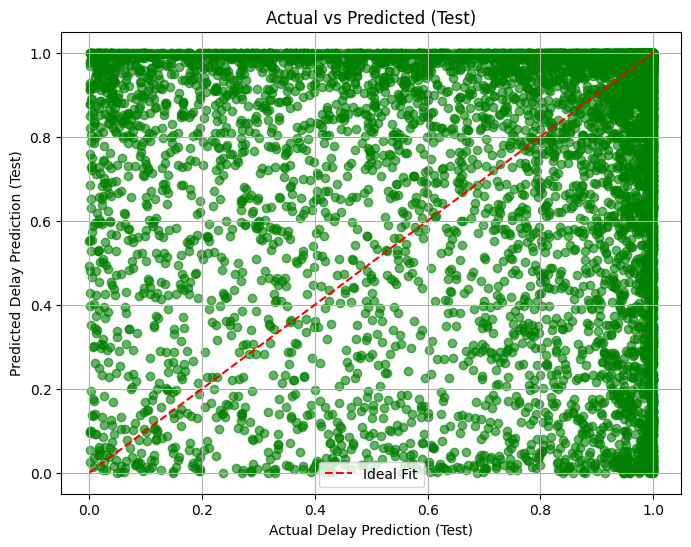

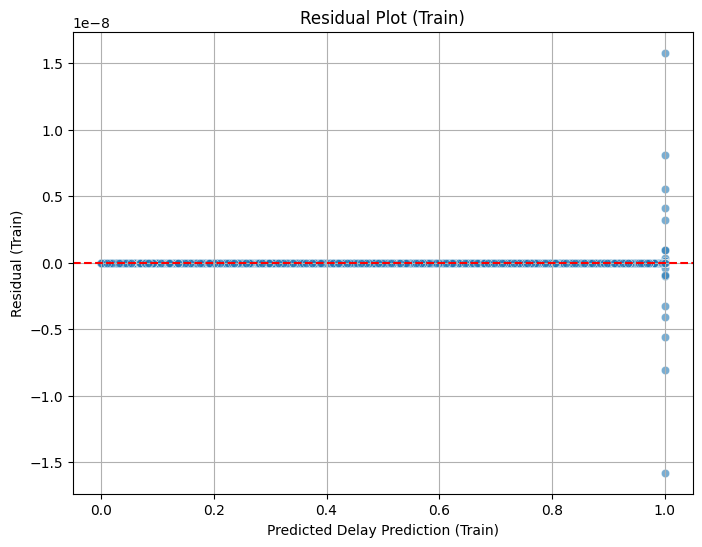

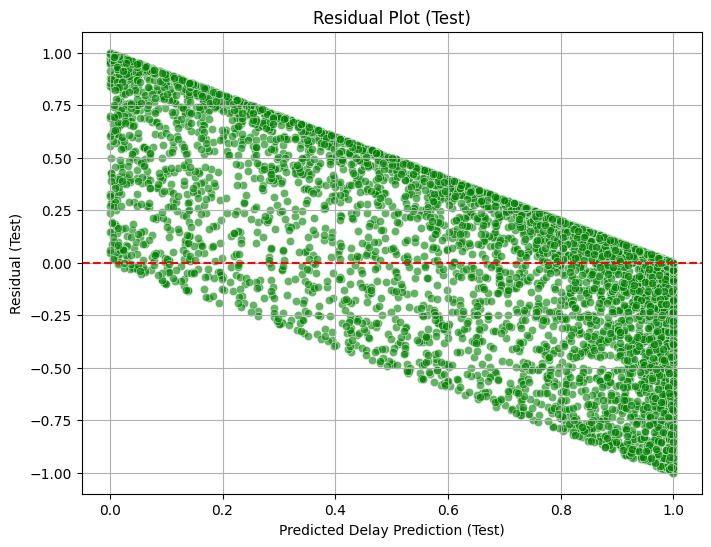

In [54]:
plt.rcParams['figure.figsize'] = (8, 6)

# Actual vs Predicted (Train)
plt.figure()
plt.scatter(y_train, y_pred_train_tree, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Delay Prediction (Train)')
plt.ylabel('Predicted Delay Prediction (Train)')
plt.title('Actual vs Predicted (Train)')
plt.legend()
plt.grid(True)
plt.show()

# Actual vs Predicted (Test)
plt.figure()
plt.scatter(y_test, y_pred_test_tree, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Delay Prediction (Test)')
plt.ylabel('Predicted Delay Prediction (Test)')
plt.title('Actual vs Predicted (Test)')
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot (Train)
residual_train = y_train - y_pred_train_tree

plt.figure()
sns.scatterplot(x=y_pred_train_tree, y=residual_train, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Delay Prediction (Train)')
plt.ylabel('Residual (Train)')
plt.title('Residual Plot (Train)')
plt.grid(True)
plt.show()

# Residual Plot (Test)
residual_test = y_test - y_pred_test_tree

plt.figure()
sns.scatterplot(x=y_pred_test_tree, y=residual_test, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Delay Prediction (Test)')
plt.ylabel('Residual (Test)')
plt.title('Residual Plot (Test)')
plt.grid(True)
plt.show()


From the model visualization above, we can conclude that:

- For test, all plots are scattered and located very widely througout the whole graph. This indicates that the model tends to perform underpredict (predicted value is smaller than actual) in the test. 
- On the train, it show very good scatter because the plot scattered near the ideal line
- For the test data, it shows wider scatter --> the model does not generalize well to new data
- The residuals in test appear to have a downward sloping linear pattern --> a strong indication that the model has not captured the true relationship (it could be a non-linear relationship) in the test.

**Global Conclusion**

- Decision Tree models prediction missed ~36% from actual prediction in the test and shows **overfitting** because the MAE score in test are very far from the train and R2 score relatively low (and even give negative score).
- The R2 score gives negative value on the test, means the model is arbitrarily worse.
- The plot on test also show very wide scatter from the ideal line (red line). This indicates that the model tends to perform underpredict
- For the residual in test appear to have a downward sloping linear pattern
- Train is very good in the beginning, but when do the cross validation, it appear to perform unwell (like the test)
- Eventhough Dublin watson gives a good score (~2), but the residual plot still shows a non-random pattern means this is not an autocorrelation 

**Advantage of Decision Tree**
- The model performs well on the training data, indicating that it is able to capture non-linear and complex patterns in the dataset. --> The algorithm is well suited to the characteristics of the data, although regularization or simplification is needed to improve generalization to the test data.

**Disdvantage of Decision Tree**
- Perfom very bad in test
- Have neagative r2 Score and overfitting --> The model cannot explain the variation in the data well.
- There is a triangular pattern and the residuals are not randomly distributed --> indicating that model failed to capture the relationship between features and targets.

## D. Random Forest

### i. Model Definition

In [55]:
#Model pipeline Random Forest
rf_pipeline = Pipeline([('preprocessing', preprocessing), ('RandomForest', RandomForestRegressor(random_state=13))])

### ii. Model Training

In [56]:
rf_pipeline.fit(X_train_2, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['fuel_consumption_rate',
                                                   'eta_variation_hours',
                                                   'traffic_congestion_level',
                                                   'warehouse_inventory_level',
                                                   'loading_unloading_time',
                                                   'handling_equipment_availability',
                                                   'order_fulfillment_status',
                                                   'weather_condition_severity',
                                                   'port_congestion_level',
                                                   'shipping_costs',
                                                   'supplier_reliability_score',
                                                   'lead_time_days',
                                                   'historical_demand',
                                                   'iot_temperature',
                                                   'cargo_condition_status',
                                                   'route_risk_level',
                                                   'customs_clearance_time',
                                                   'driver_behavior_score',
                                                   'fatigue_monitoring_score',
                                                   'month', 'year'])])),
                ('RandomForest', RandomForestRegressor(random_state=13))])

In [57]:
#Predict with train and test

y_pred_train_rf = rf_pipeline.predict(X_train_2) 
y_pred_test_rf = rf_pipeline.predict(X_test_2)

### iii. Model Evaluation

In [58]:
#Menghitung Nilai Training dg MSE
mse_train = mean_squared_error(y_train, y_pred_train_rf)
mse_test = mean_squared_error(y_test, y_pred_test_rf)

print (f'Nilai MSE Train Random Forest: {mse_train:.2f}')
print (f'Nilai MSE Test Random Forest: {mse_test:.2f}')

#Menghitung Nilai Training dg R2
r2_train = r2_score(y_train, y_pred_train_rf)
r2_test = r2_score(y_test, y_pred_test_rf)

print (f'Nilai R2 Score Train Random Forest: {r2_train:.2f}')
print (f'Nilai R2 Score Test Random Forest: {r2_test:.2f}')

Nilai MSE Train Random Forest: 0.02
Nilai MSE Test Random Forest: 0.11
Nilai R2 Score Train Random Forest: 0.86
Nilai R2 Score Test Random Forest: -0.03


From the model evaluation, we conclude that the MAE in test 0.11 and in train is 0.02. The MAE in test is 0.11 means model prediction missed 11% of actual delay probability. This means that the model perform very bad in test.

In the train the R2 score gives very good score which is 0.86 (above 80%) but the test is negative. For the R2 score, on the test it shows negative value. This means that the model can be arbitrarily worse in the test. 

The score of train and test also inidacting there is **an overfit** using this model, because the MAE score in test is higher but the train is 0.02 and r2 score relative low.

In [59]:
# Cross Validation using `cross_val_score`

mae_train_cross_val = cross_val_score(rf_pipeline,
                                     X_train_2,
                                     y_train,
                                     cv=5,
                                     scoring="neg_mean_absolute_error")
mae_train_cross_val = -mae_train_cross_val

print('MAE Score - All - Cross Validation  : ', mae_train_cross_val)
print('MAE Score - Mean - Cross Validation : ', mae_train_cross_val.mean())
print('MAE Score - Std - Cross Validation  : ', mae_train_cross_val.std())
print('MAE Score - Range of Train-Set       : ', (mae_train_cross_val.mean()-mae_train_cross_val.std()) , '-', (mae_train_cross_val.mean()+mae_train_cross_val.std()))

MAE Score - All - Cross Validation  :  [0.28672039 0.28664361 0.28317457 0.27952428 0.28563637]
MAE Score - Mean - Cross Validation :  0.2843398454586439
MAE Score - Std - Cross Validation  :  0.002727742532094647
MAE Score - Range of Train-Set       :  0.28161210292654926 - 0.2870675879907385


After testing the cross validation, from 5 fold we can see that the cross validation shows value is 28% with the mean 28%. The standard deviation also give small value which is 0.2%. However the score is vary quite far from the train. On the train evaluation, the score is 0.02 but when check the cross validation, the score is far from the test and train. This means that model is not robust and poorly simulate model performance on data it has never seen before.

In [60]:
#Check residuals

# Get residuals
y_test_residuals = y_test - y_pred_test_rf
y_test_residuals

# Perform Durbin-Watson test
durbin_watson(y_test_residuals)

np.float64(1.9867130234451509)

Based on Durbin watson test to check No-Auto Correlation, we got the score is 1.98 or ~2. This score is on the range of 1.5 - 2.0, so we can assume autocorrelation is not a problem in this model and model residuals are independent.

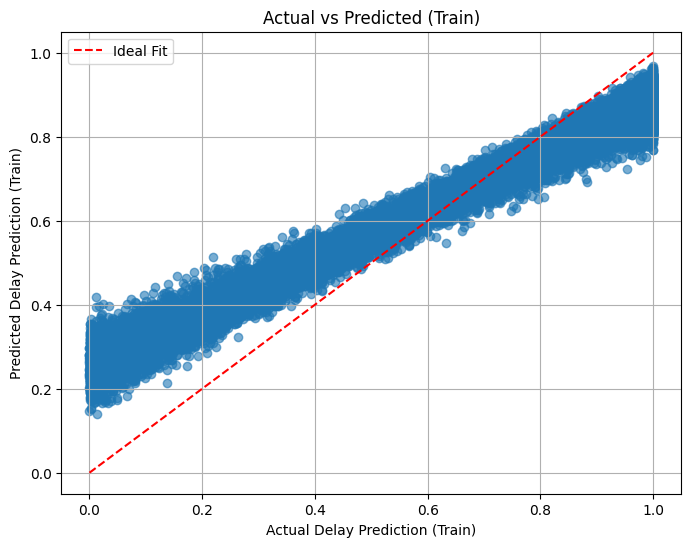

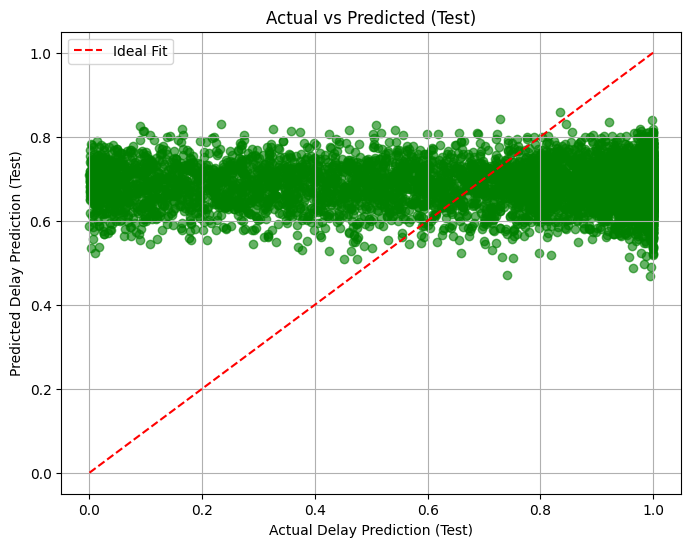

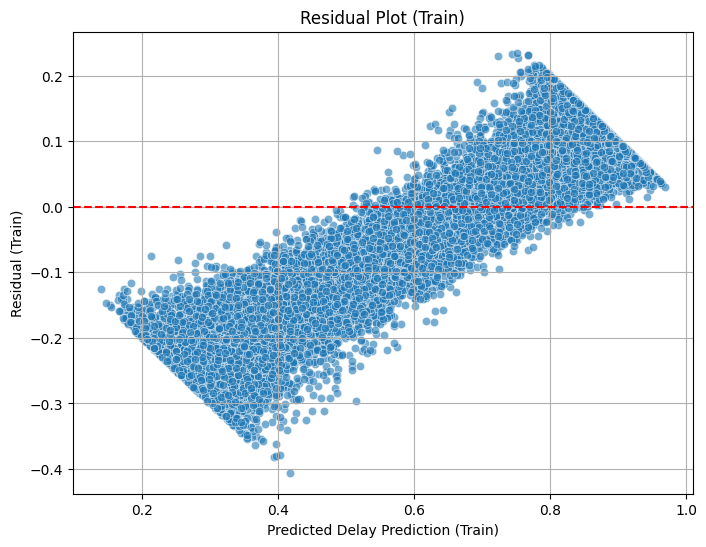

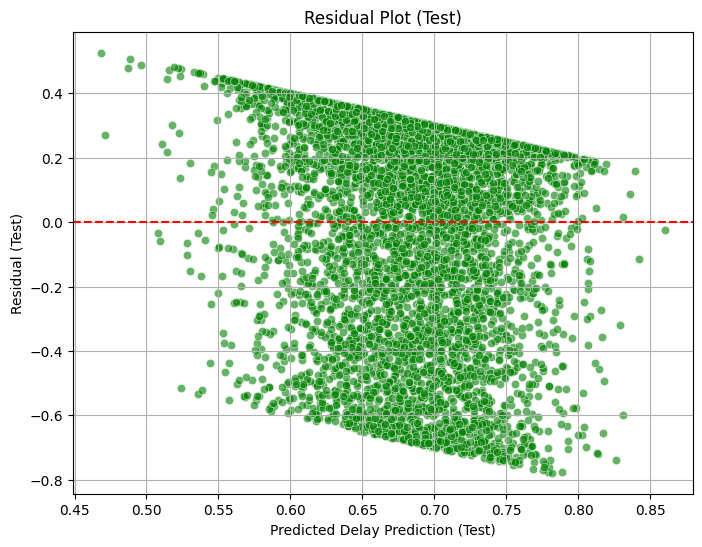

In [61]:
plt.rcParams['figure.figsize'] = (8, 6)

# Actual vs Predicted (Train)
plt.figure()
plt.scatter(y_train, y_pred_train_rf, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Delay Prediction (Train)')
plt.ylabel('Predicted Delay Prediction (Train)')
plt.title('Actual vs Predicted (Train)')
plt.legend()
plt.grid(True)
plt.show()

# Actual vs Predicted (Test)
plt.figure()
plt.scatter(y_test, y_pred_test_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Delay Prediction (Test)')
plt.ylabel('Predicted Delay Prediction (Test)')
plt.title('Actual vs Predicted (Test)')
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot (Train)
residual_train = y_train - y_pred_train_rf

plt.figure()
sns.scatterplot(x=y_pred_train_rf, y=residual_train, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Delay Prediction (Train)')
plt.ylabel('Residual (Train)')
plt.title('Residual Plot (Train)')
plt.grid(True)
plt.show()

# Residual Plot (Test)
residual_test = y_test - y_pred_test_rf

plt.figure()
sns.scatterplot(x=y_pred_test_rf, y=residual_test, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Delay Prediction (Test)')
plt.ylabel('Residual (Test)')
plt.title('Residual Plot (Test)')
plt.grid(True)
plt.show()


From the model visualization above, we can conclude that:

- For test, all plots are scattered and located widely from the ideal line. This indicates that the model tends to perform underpredict (predicted value is smaller than actual) in the test. 
- On the train, it show good scatter because the plot scattered near the ideal line eventhough not as good as Decision Tree
- For the residual plot on train and test, all plots are scattered widely from the horizontal line (red line). Eventhough in train have a good scatter plot, but in residuan train, the plot scattered widely and not located near the horizontal line.
- The residuals appear to have a downward sloping linear pattern --> a strong indication that the model has not captured the true relationship (it could be a non-linear relationship).
- Residual in test scatter very wide compare to the previous models

**Global Conclusion**

- Random Forest models prediction missed ~11% from actual prediction in the test and shows **overfitting** because the MAE score in test are far from the train and R2 score relatively low (and even give negative score).
- The R2 score gives negative value on the test, means the model is arbitrarily worse.
- The plot on test also show very wide scatter from the ideal line (red line). This indicates that the model tends to perform underpredict
- For the residual in train and test appear to have a downward sloping linear pattern
- Train is very good in the beginning, but when do the cross validation, it appear to perform unwell (like the test). --> Model not robust
- Eventhough Dublin watson gives a good score (~2), but the residual plot still shows a non-random pattern means this is not an autocorrelation 

**Advantage of Random Forest**
- The model performs well on the training data, indicating that it is able to capture non-linear and complex patterns in the dataset. --> The algorithm is well suited to the characteristics of the data, although regularization or simplification is needed to improve generalization to the test data.
- Reduce overfitting (if compare to decision tree), because it perfom better in test compare test in decision tree.

**Disdvantage of Random Forest**
- Model running takes quite long time and not suitable for dataset that have a lot of rows and columns 
- Have neagative r2 Score and overfitting --> The model cannot explain the variation in the data well.
- Residual in test scattered widely --> indicating that model failed to capture the relationship between features and targets.

## E. Boosting

### i. Model Definition

In [62]:
#Model pipeline Boosting
boosting_pipeline = Pipeline([('preprocessing', preprocessing), ('Boosting', GradientBoostingRegressor(random_state=23))])

### ii. Model Training

In [63]:
boosting_pipeline.fit(X_train_2, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['fuel_consumption_rate',
                                                   'eta_variation_hours',
                                                   'traffic_congestion_level',
                                                   'warehouse_inventory_level',
                                                   'loading_unloading_time',
                                                   'handling_equipment_availability',
                                                   'order_fulfillment_status',
                                                   'weather_condition_severity',
                                                   'port_congestion_level',
                                                   'shipping_costs',
                                                   'supplier_reliability_score',
                                                   'lead_time_days',
                                                   'historical_demand',
                                                   'iot_temperature',
                                                   'cargo_condition_status',
                                                   'route_risk_level',
                                                   'customs_clearance_time',
                                                   'driver_behavior_score',
                                                   'fatigue_monitoring_score',
                                                   'month', 'year'])])),
                ('Boosting', GradientBoostingRegressor(random_state=23))])

In [64]:
#Predict with train and test

y_pred_train_boosting = boosting_pipeline.predict(X_train_2) 
y_pred_test_boosting = boosting_pipeline.predict(X_test_2)

### iii. Model Evaluation

In [65]:
#Menghitung Nilai Training dg MSE
mae_train = mean_absolute_error(y_train, y_pred_train_boosting)
mae_test = mean_absolute_error(y_test, y_pred_test_boosting)

print (f'Nilai MAE Train Boosting: {mae_train:.2f}')
print (f'Nilai MAE Test Boosting: {mae_test:.2f}')

#Menghitung Nilai Training dg R2
r2_train = r2_score(y_train, y_pred_train_boosting)
r2_test = r2_score(y_test, y_pred_test_boosting)

print (f'Nilai R2 Score Train Boosting: {r2_train:.2f}')
print (f'Nilai R2 Score Test Boosting: {r2_test:.2f}')

Nilai MAE Train Boosting: 0.27
Nilai MAE Test Boosting: 0.28
Nilai R2 Score Train Boosting: 0.03
Nilai R2 Score Test Boosting: -0.01


From the model evaluation, we conclude that the MAE shows quite high value (if compare to 1.0). The MAE of train is 0.27 and test is 0.28 means model prediction missed almost 30% of actual delay probability. However the score from train and test is almost the same, only different 0.1

For the R2 score, it show very low score and on the test it shows negative value. This means that he model can be arbitrarily worse. A constant model that always predicts the average target disregarding the input features would get a score of r2 minimum 0.0.

The score of train and test also inidacting there is **an underfit** using this model, because the MAE score hsve higher error percentage and r2 score relative low.


In [66]:
# Cross Validation using `cross_val_score`

mae_train_cross_val = cross_val_score(boosting_pipeline,
                                     X_train_2,
                                     y_train,
                                     cv=5,
                                     scoring="neg_mean_absolute_error")
mae_train_cross_val = -mae_train_cross_val

print('MAE Score - All - Cross Validation  : ', mae_train_cross_val)
print('MAE Score - Mean - Cross Validation : ', mae_train_cross_val.mean())
print('MAE Score - Std - Cross Validation  : ', mae_train_cross_val.std())
print('MAE Score - Range of Train-Set       : ', (mae_train_cross_val.mean()-mae_train_cross_val.std()) , '-', (mae_train_cross_val.mean()+mae_train_cross_val.std()))

MAE Score - All - Cross Validation  :  [0.28145066 0.28054257 0.27761803 0.27515417 0.28057423]
MAE Score - Mean - Cross Validation :  0.2790679295648423
MAE Score - Std - Cross Validation  :  0.00234693867549696
MAE Score - Range of Train-Set       :  0.2767209908893453 - 0.28141486824033923


After testing the cross validation, from 5 fold we can see that the cross validation shows stable value from 27%-28% with the mean 27.9%. The standard deviation also give small value which is 0.2%.

This means that KNeighborRegressors shows good consitency and have stable performance across different data subsets.

In [67]:
#Check residuals

# Get residuals
y_test_residuals = y_test - y_pred_test_boosting
y_test_residuals

# Perform Durbin-Watson test
durbin_watson(y_test_residuals)

np.float64(1.987533266134314)

Based on Durbin watson test to check No-Auto Correlation, we got the score is 1.98 or ~2. This score is on the range of 1.5 - 2.0, so we can assume autocorrelation is not a problem in this model and model residuals are independent.

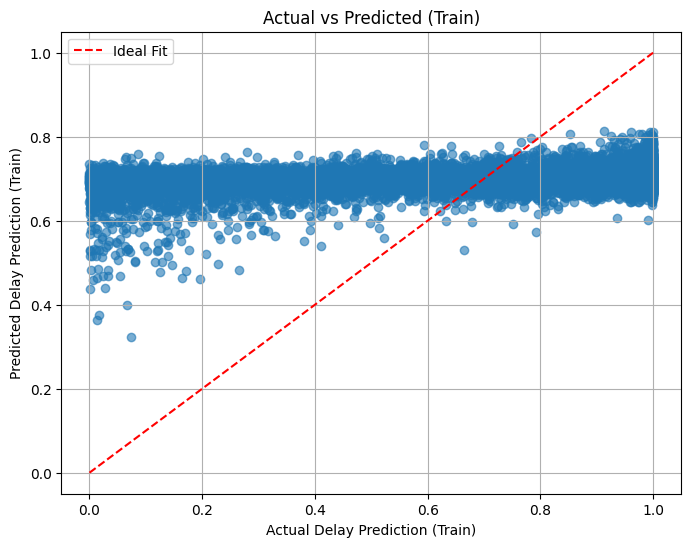

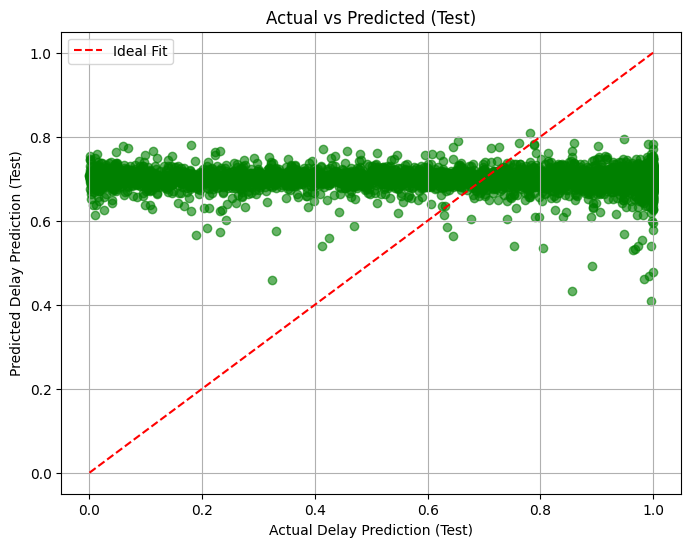

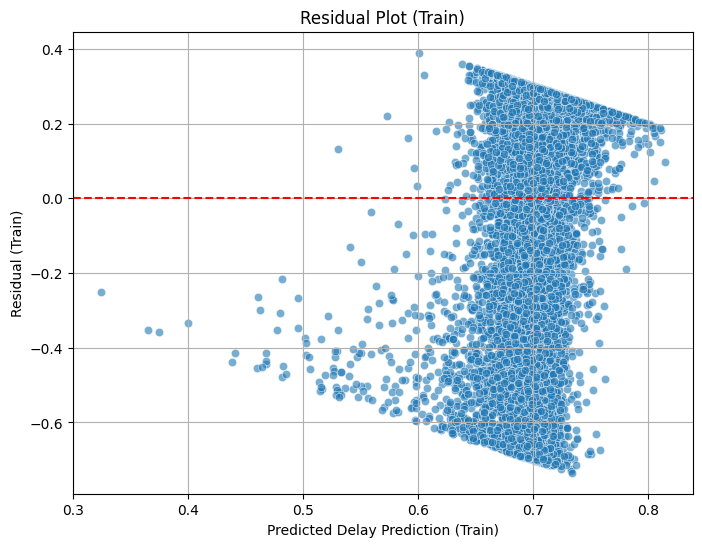

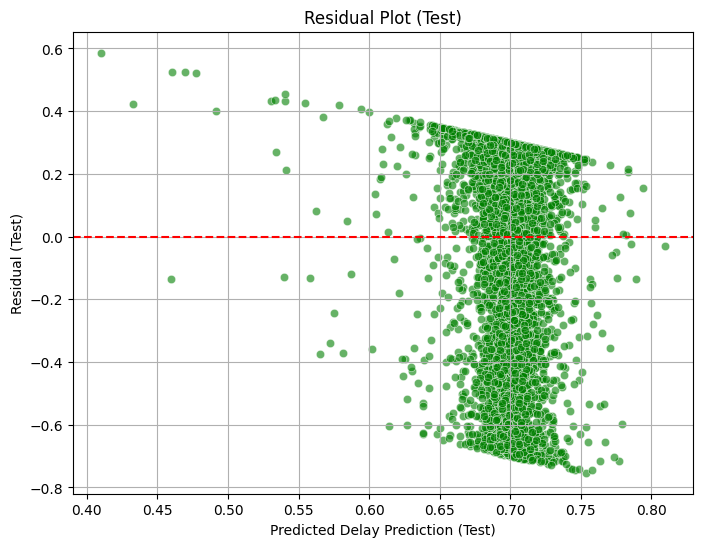

In [68]:
plt.rcParams['figure.figsize'] = (8, 6)

# Actual vs Predicted (Train)
plt.figure()
plt.scatter(y_train, y_pred_train_boosting, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Delay Prediction (Train)')
plt.ylabel('Predicted Delay Prediction (Train)')
plt.title('Actual vs Predicted (Train)')
plt.legend()
plt.grid(True)
plt.show()

# Actual vs Predicted (Test)
plt.figure()
plt.scatter(y_test, y_pred_test_boosting, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Delay Prediction (Test)')
plt.ylabel('Predicted Delay Prediction (Test)')
plt.title('Actual vs Predicted (Test)')
plt.legend()
plt.grid(True)
plt.show()

# Residual Plot (Train)
residual_train = y_train - y_pred_train_boosting

plt.figure()
sns.scatterplot(x=y_pred_train_boosting, y=residual_train, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Delay Prediction (Train)')
plt.ylabel('Residual (Train)')
plt.title('Residual Plot (Train)')
plt.grid(True)
plt.show()

# Residual Plot (Test)
residual_test = y_test - y_pred_test_boosting

plt.figure()
sns.scatterplot(x=y_pred_test_boosting, y=residual_test, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Delay Prediction (Test)')
plt.ylabel('Residual (Test)')
plt.title('Residual Plot (Test)')
plt.grid(True)
plt.show()


From the model visualization above, we can conclude that:

- For both train and test, all plots are scattered and located widely from the ideal line (red line). But this model have better scatter plot compare to other models that scttered more widely. 
- For the residual plot on train and test, all plots are scattered widely from the horizontal line (red line)
- The residuals appear to have funnel shape --> indicates heteroscedasticity.
- Most residuals are negative, especially at the lower end of predictions --> This suggests that model is underestimating the true delay values — predicting delays lower than the actual delays.

**Global Conclusion**

- Boosting models prediction missed ~30% from actual prediction and shows **underfitting** because the MAE score is quite high (reach almost 30%) and R2 score relatively low (and even give negative score).
- R2 score also shows very low score --> have low accuracy in predicting
- However the R2 score gives negative value on the test, means the model is arbitrarily worse.
- The plot of train and test also show wider scatter from the ideal line (red line). This indicates that the model tends to perform underpredict, eventhough scatter plot perform better compare to other models.
- More residuals are negative suggests that model is underestimating the true delay values — predicting delays lower than the actual delays.
- Eventhough Dublin watson gives a good score (~2), but the residual plot still shows a non-random pattern means this is not an autocorrelation 
- **This model will be used for further hyperparameter tunning evaluation**

**Advantage of Boosting**
- Have stable performance and good consistency in making prediction.
- Perform better compare to other models and show better scatter plot
- Train and test shows similiar value

**Disdvantage of Boosting**
- Model running takes quite long time and not very suitable for dataset that have a lot of rows and columns 
- Have neagative r2 Score and underfitting --> The model cannot explain the variation in the data well.
- Have more residual in negative value --> underestimating the true delay values 

## F. Hyperparameter Tunning

For hyperparameter tunning, we will use **boosting** because it perform well compare to other models. This model is powerful because it builds strong models by combining weak learners and correcting their errors step by step. It handles complexity, nonlinearities, and avoids overfitting with built-in regularization.

### Model Definition + Training

In [69]:
# Define Hyperparameters

random_search_params = {
    'Boosting__n_estimators' : [30, 50, 100, 150, 200],
    'Boosting__max_depth': [10, 20, 30, 50, 70],
    'Boosting__min_samples_split': [5, 10, 20, 30],
    'Boosting__min_samples_leaf': [1, 2, 4, 8, 10],
    'Boosting__random_state': [33]
}

randomcv = RandomizedSearchCV(estimator=boosting_pipeline,
                                 param_distributions=random_search_params,
                                 n_iter=7,
                                 cv=5,
                                 random_state=33,
                                 n_jobs=-1,
                                 scoring='neg_mean_absolute_error')
randomcv.fit(X_train_2, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('scaling',
                                                                                                StandardScaler())]),
                                                                               ['fuel_consumption_rate',
                                                                                'eta_variation_hours',
                                                                                'traffic_congestion_level',
                                                                                'warehouse_inventory_level',
                                                                                'loading_unloading_time',
                                                                                'handling_equipment_availability',
                                                                                'order_fulfillment_status',
                                                                                'we...
                                                                                'year'])])),
                                             ('Boosting',
                                              GradientBoostingRegressor(random_state=23))]),
                   n_iter=7, n_jobs=-1,
                   param_distributions={'Boosting__max_depth': [10, 20, 30, 50,
                                                                70],
                                        'Boosting__min_samples_leaf': [1, 2, 4,
                                                                       8, 10],
                                        'Boosting__min_samples_split': [5, 10,
                                                                        20,
                                                                        30],
                                        'Boosting__n_estimators': [30, 50, 100,
                                                                   150, 200],
                                        'Boosting__random_state': [33]},
                   random_state=33, scoring='neg_mean_absolute_error')

In [70]:
# Get Best Hyperparameters

randomcv_best = randomcv.best_params_
randomcv_best = randomcv.best_estimator_

randomcv_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['fuel_consumption_rate',
                                                   'eta_variation_hours',
                                                   'traffic_congestion_level',
                                                   'warehouse_inventory_level',
                                                   'loading_unloading_time',
                                                   'handling_equipment_availability',
                                                   'order_fulfillment_status',
                                                   'weather_condition_severity',
                                                   'port_co...
                                                   'supplier_reliability_score',
                                                   'lead_time_days',
                                                   'historical_demand',
                                                   'iot_temperature',
                                                   'cargo_condition_status',
                                                   'route_risk_level',
                                                   'customs_clearance_time',
                                                   'driver_behavior_score',
                                                   'fatigue_monitoring_score',
                                                   'month', 'year'])])),
                ('Boosting',
                 GradientBoostingRegressor(max_depth=10, min_samples_leaf=4,
                                           min_samples_split=20,
                                           n_estimators=30, random_state=33))])

In [71]:
#Predict with train and test

y_pred_train_hp = randomcv_best.predict(X_train_2) 
y_pred_test_hp = randomcv_best.predict(X_test_2)

### Model Evaluation

In [72]:
#Menghitung Nilai Training dg MSE
mae_train = mean_absolute_error(y_train, y_pred_train_hp)
mae_test = mean_absolute_error(y_test, y_pred_test_hp)

print (f'Nilai MAE Train Tunning : {mae_train:.2f}')
print (f'Nilai MAE Test Tunning: {mae_test:.2f}')

#Menghitung Nilai Training dg R2
r2_train = r2_score(y_train, y_pred_train_hp)
r2_test = r2_score(y_test, y_pred_test_hp)

print (f'Nilai R2 Score Train Tunning: {r2_train:.2f}')
print (f'Nilai R2 Score Test Tunning: {r2_test:.2f}')

Nilai MAE Train Tunning : 0.25
Nilai MAE Test Tunning: 0.28
Nilai R2 Score Train Tunning: 0.16
Nilai R2 Score Test Tunning: -0.02


From the model evaluation after tunning, MAE gives better score in train but in test still the same. R2 score also perform better in train after tunning. However, after tunning the R2 score in test still show negative value means that the model is arbitrarily worse and  tends to perform underpredict

The score of train and test also inidacting there is **an underfit** using this model, because the MAE score hsve higher error percentage and r2 score relative low.

So for further improvement, feature creation should be performed until got the good model. Additionally, feature importance can be showed to check is there any features that not really contribute to the model. From this, can be checked again if it can imporve the model if we drop feature with low number of feature importance

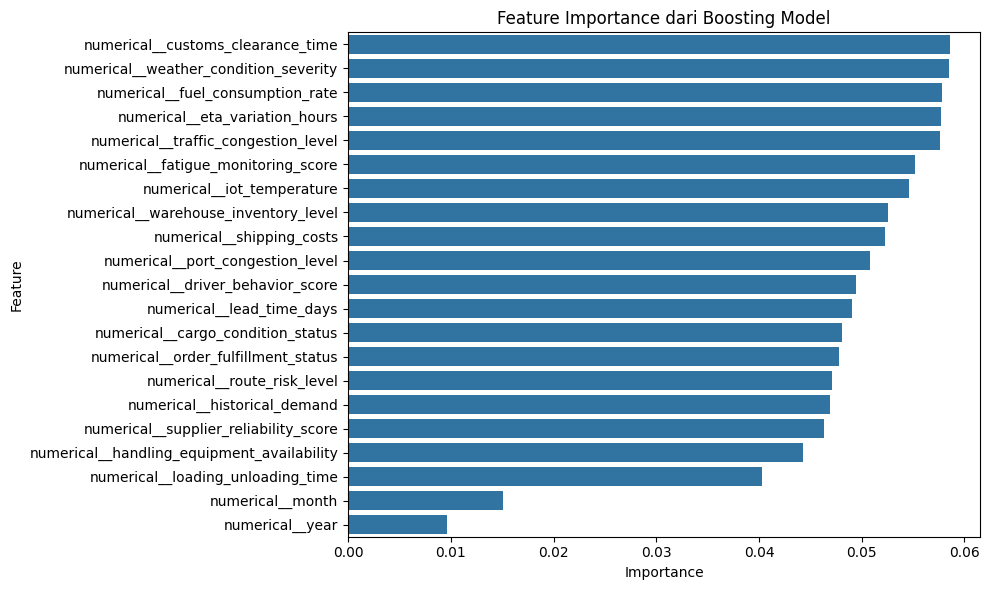

In [73]:
# Ambil nama fitur dari preprocessing pipeline
feature_names = randomcv_best.named_steps['preprocessing'].get_feature_names_out()

# Ambil importance dari model
importances = randomcv_best.named_steps['Boosting'].feature_importances_

# Buat DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance dari Boosting Model')
plt.tight_layout()
plt.show()

From this graph, we can see month and year have low values in feature importance. So we will try to drop those values and check again for the evaluation

In [74]:
X_train_hp = X_train_2.drop(columns=['month', 'year'])
X_test_hp = X_test_2.drop(columns=['month', 'year'])

# 2. Ambil kolom numerik
numerical_cols_hp = X_train_hp.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Buat ulang preprocessor
preprocessor_hp = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols_hp)
])

# Ambil best_params hanya untuk model regressor, hilangkan prefix 'Boosting__'
best_model_params = {k.split('__')[1]: v for k, v in randomcv.best_params_.items()}

model_hp_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_hp),
    ('regressor', GradientBoostingRegressor(**best_model_params))
])

# 5. Fit model ulang
model_hp_pipeline.fit(X_train_hp, y_train)

# 6. Predict
y_pred_train_hp2 = model_hp_pipeline.predict(X_train_hp)
y_pred_test_hp2 = model_hp_pipeline.predict(X_test_hp)

# 7. Evaluasi
print("MAE Train:", mean_absolute_error(y_train, y_pred_train_hp2))
print("MAE Test :", mean_absolute_error(y_test, y_pred_test_hp2))
print("R² Train :", r2_score(y_train, y_pred_train_hp2))
print("R² Test  :", r2_score(y_test, y_pred_test_hp2))

MAE Train: 0.2563238743743835
MAE Test : 0.2838934469575446
R² Train : 0.14725223106527874
R² Test  : -0.01310034055861875


From the model evaluation after tunning and feature importance, the MAE score is slightly different from before dropping column year and month. 
R2 score is increase a litte from 0.16 to 0.18 in train, but in test decrease from -0.02 to -0.01
So dropping year and month columns don't really have a great impact for the model improvement. 

In [75]:

results = {
    "Model": ["Boosting", "Boosting + Tuning"],
    "MAE Train": [mean_absolute_error(y_train, y_pred_train_boosting),
                  mean_absolute_error(y_train, y_pred_train_hp)],
    "MAE Test": [mean_absolute_error(y_test, y_pred_test_boosting),
                 mean_absolute_error(y_test, y_pred_test_hp)],
    "R2 Train": [r2_score(y_train, y_pred_train_boosting),
                 r2_score(y_train, y_pred_train_hp)],
    "R2 Test": [r2_score(y_test, y_pred_test_boosting),
                r2_score(y_test, y_pred_test_hp)]
}

results_df = pd.DataFrame(results)
results_df = results_df.round(2)

# Show tables
results_df


Model  MAE Train  MAE Test  R2 Train  R2 Test
0           Boosting       0.27      0.28      0.03    -0.01
1  Boosting + Tuning       0.25      0.28      0.16    -0.02

After finishig hyperparameter tunning, we can see there is a little improvement from baseline Boosting Model to Tunning Boosting Model.
For the MAE Train, it shows a decrease from 0.27 to 0.25 and R2 score increase from 0.03 to 0.16. Eventhoug in test almost have same values, but at least in train shows a little improvement.

**Therefore, we will use Model Boosting + Tunning for model saving and inference.**

# VIII. Model Saving

In [76]:
#Save the files

with open('model_fix.pkl', 'wb') as file:
    pickle.dump(randomcv_best, file)

# IX. Model Inference

Model inference will be done in a different notebook. In the model inference, a delay prediction of a shipment will be predicted. Later, the trained model can provide predictions according to the features entered into the model.

# X. Conclusion and Recommendation

**CONCLUSION**

Based on creating a machine learning model to predict delay probability of shipment, here arr the following conclusions:
- Final model that is used for this machine learning contains 22 columns and 30.625 rows.
- From 2021-2024, company still have 'High Risk' in delay probability as the highest category which account for 0.7 - 1.0.
- Matrics that being used is MAE and R2 score for model evaluation.
- We evaluated 5 models + 1 hyperparameter tunning for this analysis and **Boosting + Tunning** perform well compare to other models.
- The results of training and evaluation tests of the model show that the model is **underfit**. The main reason because in feature engineering it shows that most of columns don't have correlation with the target.
- This model have errors for around 25-30% and in test the R2 score show negative result. This indicates that the model it's not perform well and tend to underpredict.

**RECOMMENDATION**

In order for this model to predict results well and accurately, here are some recommendations that can be given:
- Re-evaluate the columns and the features used whether they have been processed well at the feature engineering stage.
- Improve features with feature creation until features show correlation with the target.
- Conduct training and evaluation of the model until a low error of <10-15% is obtained so that it can provide relevant and accurate results.
